<a href="https://colab.research.google.com/github/YatsiukTetiana/Project_Online_Store_Sale_-Analytics-/blob/main/Online_Store_Sales_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Project

Created by **Tetiana Yatsiuk**  
*Email:* tet.yatsiuk@gmail.com  
*LinkedIn:* www.linkedin.com/in/tetianayatsiuk  
*GitHub:* https://github.com/YatsiukTetiana

#1. Connecting to the BigQuery

In [2]:
# Importing Libraries
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

In [3]:
# Authentication
auth.authenticate_user()

# Creating a client for BigQuery
client = bigquery.Client(project = "data-analytics-mate")

In [4]:
# SQL-query
query = """
SELECT
  s.date AS order_date,
  o.ga_session_id,
  sp.continent,
  sp.country,
  sp.device,
  sp.browser,
  sp.mobile_model_name,
  sp.operating_system,
  sp.language,
  sp.medium,
  sp.name AS channel_name,
  sp.channel,
  acs.account_id,
  acc.is_verified,
  acc.is_unsubscribed,
  o.item_id,
  p.category,
  p.name AS product_name,
  p.price,
  p.short_description
FROM
  `data-analytics-mate.DA.order` o
JOIN
  `data-analytics-mate.DA.product` p
ON
  o.item_id = p.item_id
JOIN
  `data-analytics-mate.DA.session` s
ON
  o.ga_session_id = s.ga_session_id
JOIN
  `data-analytics-mate.DA.session_params` sp
ON
  o.ga_session_id = sp.ga_session_id
LEFT JOIN
  `data-analytics-mate.DA.account_session` acs
ON
  o.ga_session_id = acs.ga_session_id
LEFT JOIN
  `data-analytics-mate.DA.account` acc
ON
  acs.account_id = acc.id
"""


In [5]:
# Executing query
query_job = client.query(query)  # Executing a SQL query
results = query_job.result()  # Waiting for the request to complete

# Converting results to a DataFrame
df = results.to_dataframe()

# Outputting the result
df.head()

,order_date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,medium,channel_name,channel,account_id,is_verified,is_unsubscribed,item_id,category,product_name,price,short_description
0,2020-11-01,967742695,Americas,United States,desktop,Safari,Safari,Web,en-us,(data deleted),(data deleted),Undefined,<NA>,<NA>,<NA>,99902661,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
1,2020-11-01,9065007548,Asia,China,desktop,Chrome,Safari,Web,None,(data deleted),(data deleted),Undefined,<NA>,<NA>,<NA>,99902661,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
2,2020-11-01,3267062634,Americas,United States,desktop,Chrome,Safari,Web,en-us,(data deleted),(data deleted),Undefined,<NA>,<NA>,<NA>,99902661,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
3,2020-11-01,5483849751,Americas,United States,desktop,Safari,Safari,Web,None,(data deleted),(data deleted),Undefined,<NA>,<NA>,<NA>,70264281,Chairs,LERHAMN,145.0,Chair
4,2020-11-01,9254546338,Europe,Ireland,mobile,Chrome,<Other>,Web,en-us,(data deleted),(data deleted),Undefined,<NA>,<NA>,<NA>,49128969,Children's furniture,PÅHL,425.0,"Desk with add-on unit, 128x58 cm"


#2. Exploratory Data Analysis

##2.1. Data Overview

In [6]:
df.head()

,order_date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,medium,channel_name,channel,account_id,is_verified,is_unsubscribed,item_id,category,product_name,price,short_description
0,2020-11-01,967742695,Americas,United States,desktop,Safari,Safari,Web,en-us,(data deleted),(data deleted),Undefined,<NA>,<NA>,<NA>,99902661,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
1,2020-11-01,9065007548,Asia,China,desktop,Chrome,Safari,Web,None,(data deleted),(data deleted),Undefined,<NA>,<NA>,<NA>,99902661,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
2,2020-11-01,3267062634,Americas,United States,desktop,Chrome,Safari,Web,en-us,(data deleted),(data deleted),Undefined,<NA>,<NA>,<NA>,99902661,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
3,2020-11-01,5483849751,Americas,United States,desktop,Safari,Safari,Web,None,(data deleted),(data deleted),Undefined,<NA>,<NA>,<NA>,70264281,Chairs,LERHAMN,145.0,Chair
4,2020-11-01,9254546338,Europe,Ireland,mobile,Chrome,<Other>,Web,en-us,(data deleted),(data deleted),Undefined,<NA>,<NA>,<NA>,49128969,Children's furniture,PÅHL,425.0,"Desk with add-on unit, 128x58 cm"


### All Columns Description

The Data describes **_sessions with orders_**, including those placed without creating an account.  
Generally, data columns can be divided into the following logical sections:  

**Session Parameters**:
- *order_date* - the date of placing the order;
- *ga_session_id*	- unique identifier for each session;
- *continent*	- the continent from which the order was placed;
- *country*	- the country from which the order was placed;
- *device* - the device used to place the order;
- *browser* - the browser used to place the order;
- *mobile_model_name*	- model name of the device from which the order was made;
- *operating_system* - operating system of the device from which the order was placed;
- *language* - the browser language;
- *medium* - the general marketing channel or referrer type (e.g., organic, referral);
- *channel_name* - the specific name of the marketing channel;
- *channel*	- the grouping of marketing channels (e.g., Organic Search, Paid Search, Direct).

**Account Parameters**:
- *account_id* - unique identifier for the customer's account;
- *is_verified* - indicates whether the customer's account is verified (e.g., 1 for true, 0 for false);
- *is_unsubscribed* - indicates whether the customer has unsubscribed from marketing communications (e.g., 1 for true, 0 for false).

**Product Parameters**:
- *item_id* - unique identifier for the product item;
- *category* - the product's category (e.g., electronics, chairs, books);
- *product_name* - the full name of the product;
- *price* - the selling price of the product;
- *short_description* - a brief descriptive text about the product.

### DataFrame Description

In [7]:
print(f"The DataFrame contains {df.shape[0]} records (unique sessions) in {df.shape[1]} columns")

The DataFrame contains 33538 records (unique sessions) in 20 columns


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_date         33538 non-null  dbdate 
 1   ga_session_id      33538 non-null  Int64  
 2   continent          33538 non-null  object 
 3   country            33538 non-null  object 
 4   device             33538 non-null  object 
 5   browser            33538 non-null  object 
 6   mobile_model_name  33538 non-null  object 
 7   operating_system   33538 non-null  object 
 8   language           22531 non-null  object 
 9   medium             33538 non-null  object 
 10  channel_name       33538 non-null  object 
 11  channel            33538 non-null  object 
 12  account_id         2781 non-null   Int64  
 13  is_verified        2781 non-null   Int64  
 14  is_unsubscribed    2781 non-null   Int64  
 15  item_id            33538 non-null  Int64  
 16  category           335

#### Numerical Type Columns

In [9]:
# Including all numeric types that pandas identifies as number
numerical_col = df.select_dtypes(include= ['number']).columns.tolist()
print(f"Number of numerical type columns: {len(numerical_col)}")
print(f"List of numerical columns: {', '.join(numerical_col)}")

Number of numerical type columns: 6
List of numerical columns: ga_session_id, account_id, is_verified, is_unsubscribed, item_id, price


Although *pandas* recognize columns *ga_session_id*, *account_id*, *is_verified*, *is_unsubscribed*, and *item_id* as numerical, these data is **_categorical_**.
- *ga_session_id*, *account_id*, and *item_id* are identifiers;
- *is_verified* and *is_unsubscribed* are rather boolean categorical data;

So, only **_price_** is really numerical data.

#### Categorical Type Columns

In [10]:
# Including all categorical types that pandas identifies as object
categorical_col = df.select_dtypes(include = ['object']).columns.tolist()

# Includind categorical data which is recognized as numerical
conceptual_categorical = ['ga_session_id', 'account_id', 'item_id', 'is_verified', 'is_unsubscribed']
conceptual_categorical_in_df = [col for col in conceptual_categorical if col in df.columns]

# Concatenating lists of categorical columns
# set - for not duplicating names if there are duplicates
all_categorical_col = list(set(categorical_col + conceptual_categorical_in_df))

print(f"Number of categorical type columns: {len(all_categorical_col)}")
print(f"List of categorical columns: {', '.join(all_categorical_col)}")

Number of categorical type columns: 18
List of categorical columns: is_verified, account_id, channel, category, product_name, operating_system, short_description, language, country, mobile_model_name, ga_session_id, continent, item_id, channel_name, is_unsubscribed, device, browser, medium


18 categorical columns:   
*ga_session_id, country, is_verified, item_id, medium, language, channel_name, operating_system, short_description, category, browser, mobile_model_name, account_id, channel, product_name, is_unsubscribed, continent, device.*

#### Datetime Type Columns

In [11]:
# converting 'dbdate' to datetime64[ns]
df["order_date"] = pd.to_datetime(df["order_date"])

# Including datetime types that pandas identifies as datetime
datetime_col = df.select_dtypes(include = ["datetime"]).columns.tolist()
print(f"Number of datetime type columns: {len(datetime_col)}")
print(f"List of datetime columns: {', '.join(datetime_col)}")

Number of datetime type columns: 1
List of datetime columns: order_date


1 datetime column: *order_date*

#### Order Date Range

In [12]:
if "order_date" in df.columns and not df["order_date"].isnull().all():
  start_date = df["order_date"].min()
  end_date = df["order_date"].max()
  print (f"The Order Date Range is from {start_date} to {end_date}")
else:
  print("Some order data is missed. The DataFrame should be cleaned from NULLs first.")

The Order Date Range is from 2020-11-01 00:00:00 to 2021-01-27 00:00:00


The Order Date Range: from 2020-11-01 to 2021-01-27

#### Checking for NULL in Сolumns

In [13]:
# Counting NULLs in columns
df.isna().sum()

,0
order_date,0
ga_session_id,0
continent,0
country,0
device,0
browser,0
mobile_model_name,0
operating_system,0
language,11007
medium,0


In [14]:
# null percentage
print(df.isna().sum() / df.shape[0] * 100)

order_date            0.000000
ga_session_id         0.000000
continent             0.000000
country               0.000000
device                0.000000
browser               0.000000
mobile_model_name     0.000000
operating_system      0.000000
language             32.819488
medium                0.000000
channel_name          0.000000
channel               0.000000
account_id           91.707913
is_verified          91.707913
is_unsubscribed      91.707913
item_id               0.000000
category              0.000000
product_name          0.000000
price                 0.000000
short_description     0.000000
dtype: float64


DataFrame contains NULLs:  
1. For account data (30757 rows, 91.7% of data).   
  The column contains NULLs because the DataFrame took into account orders placed without registering an account.  
2. For language (11007 rows, 32.8% of data).  
Since other session parameters are recorded, including country, the absence of browser language data is not crucial.

To avoid appearing NULLs in further analysis, we replace NULL by Unknown in 'language' column

In [15]:
df["language"] = df["language"].fillna("Unknown")

#### Checking for Anomalies in Numerical Data

In [16]:
df.describe()

,order_date,ga_session_id,account_id,is_verified,is_unsubscribed,item_id,price
count,33538,33538.0,2781.0,2781.0,2781.0,33538.0,33538.000000
mean,2020-12-14 15:09:05.506589184,4964900683.146312,658815.525351,0.71521,0.160734,47753715.295247,953.298679
min,2020-11-01 00:00:00,330355.0,636138.0,0.0,0.0,91415.0,3.000000
25%,2020-11-25 00:00:00,2476893918.0,647432.0,0.0,0.0,20346072.0,170.000000
50%,2020-12-13 00:00:00,4961245290.0,658322.0,1.0,0.0,49259743.0,445.000000
75%,2021-01-06 00:00:00,7442296865.75,670218.0,1.0,0.0,70340807.0,1195.000000
max,2021-01-27 00:00:00,9999754183.0,681955.0,1.0,1.0,99930961.0,9585.000000
std,NaN,2884281407.544152,13140.190977,0.451395,0.367351,28778685.186469,1317.001775


There are no amonalies in data (no negative numbers, no other numbers for boolean data except 0 and 1).

## 2.2. Data analysis and visualization

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

### 2.2.1. Key Metrics (Overview)

1. Total Number of Sessions with Orders
2. Number of Continents Covered
2. Number of Countries Covered
3. Number of Devices
4. Number of Operating Systems
5. Number of Languages
6. Number of Products
7. Number of Product Categories
8. Number of Registered Accounts

In [18]:
metrics = {
    "Total Number of Sessions with Orders": df["ga_session_id"].count(),
    "Number of Continents Covered": df["continent"].nunique(),
    "Number of Countries Covered": df["country"].nunique(),
    "Number of Devices": df["device"].nunique(),
    "Number of Operating Systems": df["operating_system"].nunique(),
    "Number of Languages": df["language"].nunique() - 1, #one language value is "Unknown"
    "Number of Products": df["product_name"].nunique(),
    "Number of Product Categories": df["category"].nunique(),
    "Number of Registered Accounts": df["account_id"].nunique()
}

In [19]:
# DataFrame from metrics
metrics_df = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
metrics_df.reset_index()
display(metrics_df)

,Metric,Value
0,Total Number of Sessions with Orders,33538
1,Number of Continents Covered,6
2,Number of Countries Covered,108
3,Number of Devices,3
4,Number of Operating Systems,6
5,Number of Languages,9
6,Number of Products,550
7,Number of Product Categories,14
8,Number of Registered Accounts,2781


### 2.2.2. Analyzing Data and Finding Insights


#### On Which Continents (Top 3) and in Which Countries (Top 5) does the Company Have the Largest Sales? The Largest Number of Orders?

In [20]:
# Continent Analysis
continent_sales = df.groupby("continent").agg(total_sales = ("price", "sum"), orders_cnt = ("ga_session_id", "nunique")).reset_index()

# By Total Sales
top3_continent_sales = continent_sales.sort_values(by = "total_sales", ascending = False).head(3)
print(f"Top-3 Continents by Sales:\n {top3_continent_sales}\n\n")

# By Number of Orders
top3_continent_orders = continent_sales.sort_values(by = "orders_cnt", ascending = False).head(3)
print(f"Top-3 Continents by Orders:\n {top3_continent_orders}")

Top-3 Continents by Sales:
   continent  total_sales  orders_cnt
2  Americas   17665280.0       18553
3      Asia    7601298.3        7950
4    Europe    5934624.2        6261


Top-3 Continents by Orders:
   continent  total_sales  orders_cnt
2  Americas   17665280.0       18553
3      Asia    7601298.3        7950
4    Europe    5934624.2        6261


In [21]:
# Country Analysis
country_sales = df.groupby("country").agg(total_sales = ("price", "sum"), orders_cnt = ("ga_session_id", "nunique")).reset_index()

# By Total Sales
top5_country_sales = country_sales.sort_values(by = "total_sales", ascending = False).head(5)
print(f"Top-5 Countries by Sales:\n {top5_country_sales}\n\n")

# By Orders
top5_country_orders = country_sales.sort_values(by = "orders_cnt", ascending = False).head(5)
print(f"Top-5 Countries by Orders:\n {top5_country_orders}")

Top-5 Countries by Sales:
             country  total_sales  orders_cnt
104   United States   13943553.9       14673
43            India    2809762.0        3029
18           Canada    2437921.0        2560
103  United Kingdom     938317.9        1029
33           France     710692.8         678


Top-5 Countries by Orders:
             country  total_sales  orders_cnt
104   United States   13943553.9       14673
43            India    2809762.0        3029
18           Canada    2437921.0        2560
103  United Kingdom     938317.9        1029
33           France     710692.8         678


**Top-3 Continents** by Sales and Number of Orders:
1. Americas (*17,665,280.0 USD* of total sales; *18,553* orders)  
2. Asia (*7,601,298.3 USD* of total sales; *7,950* orders)
3. Europe (*5,934,624.2 USD* of total sales; *6,261* order)

**Top-5 Countries** by Sales and Number of Orders:
1. United States (*13,943,553.9 USD* of total sales; *14,673* orders)
2. India (*2,809,762.0 USD* of total sales; *3,029* orders)
3. Canada (*2,437,921.0 USD* of total sales; *2,560* orders)
4. United Kingdom (*938,317.9 USD* of total sales; *1,029* orders)
5. France (*710,692.8 USD* of total sales; *678* orders)

**_The largest number of orders:_**
- by continent: 18,553 orders (Americas)
- by country:  14,673 orders (United States)

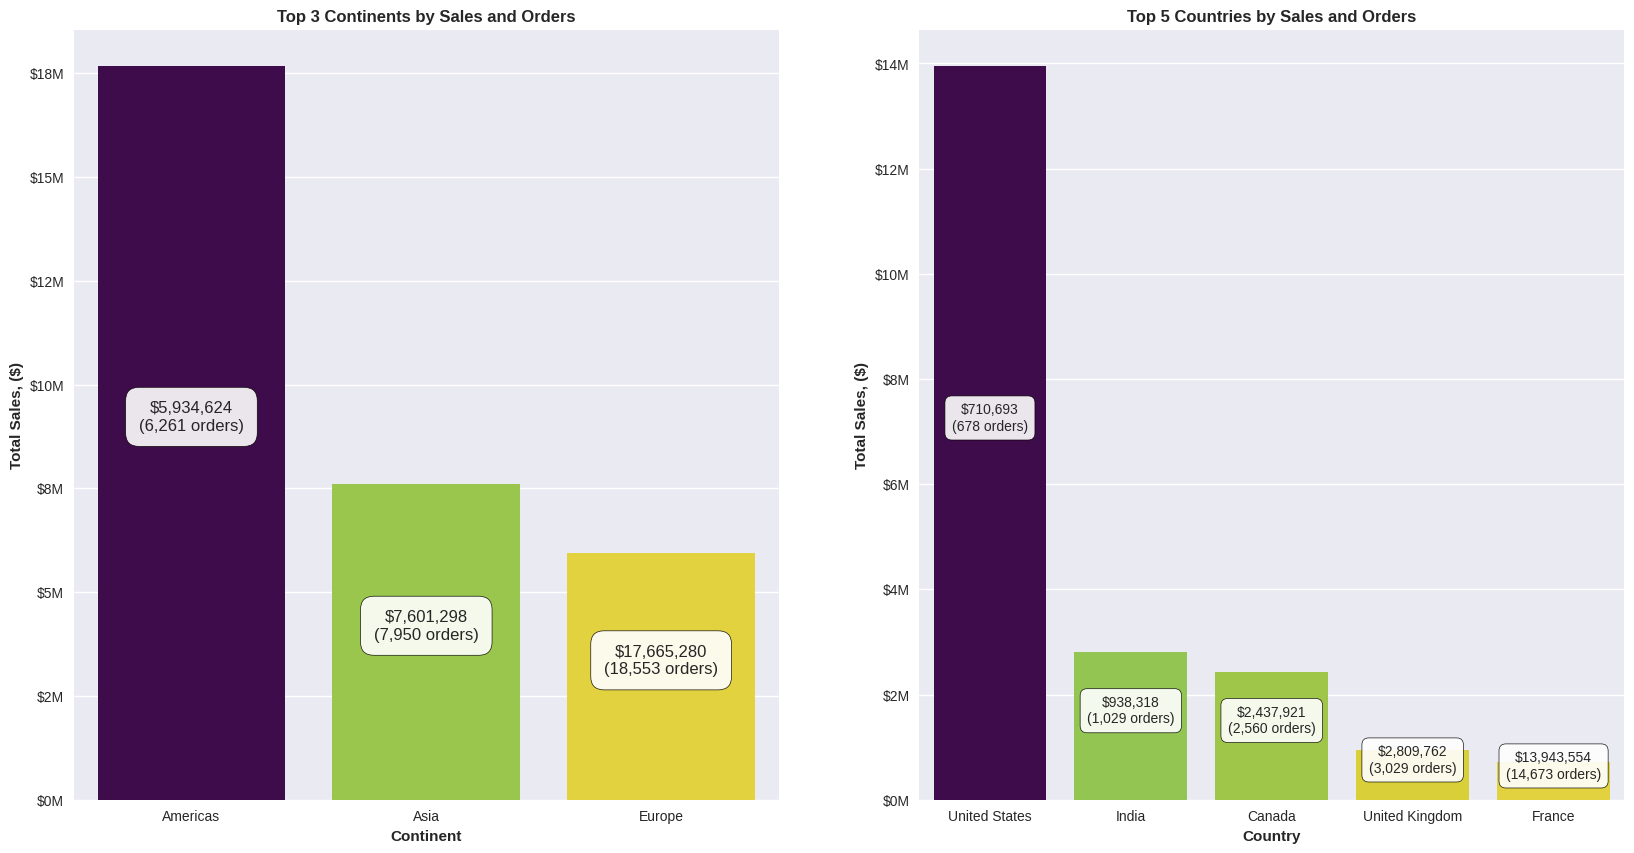

In [22]:
plt.figure(figsize = (20, 10))
plt.style.use("seaborn-v0_8")

# Top 3 Continents by Sales and Orders
plt.subplot(1, 2, 1)
top_continent = sns.barplot(x = top3_continent_sales["continent"], y = top3_continent_sales["total_sales"],
                            hue = top3_continent_sales["total_sales"], palette = "viridis_r", legend = False)
ax_top_continent = top_continent.axes

bbox_properties = dict(
    boxstyle = "round, pad = 0.8", # Frame style: “round” - rounded corners, “pad” - internal indentation
    facecolor = "white",        # Frame background color
    edgecolor = "black",        # Frame border color (can be “none” for no border)
    linewidth = 0.5,            # Border width
    alpha = 0.9                 # Transparency of the frame (0.0 - completely transparent, 1.0 - opaque)
)

for i, bar in enumerate(ax_top_continent.patches):
    # Getting the corresponding data string from `top3_continent_sales` by index `i`
    current_sales = top3_continent_sales.iloc[i]["total_sales"]
    current_orders = top3_continent_sales.iloc[i]["orders_cnt"]

    # Formatting sales text
    sales_text = f"${current_sales:,.0f}"
    # Formatting order text
    orders_text = f"{current_orders:,.0f} orders"
    combined_text = f"{sales_text}\n({orders_text})"

    ax_top_continent.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() * 0.5,
      combined_text,
      fontsize = 12,
      ha = "center", va = "bottom",
      bbox = bbox_properties
  )

ax_top_continent.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e6:.0f}M"))
plt.title("Top 3 Continents by Sales and Orders", fontweight = "bold")
plt.xlabel("Continent", fontweight = "bold")
plt.ylabel("Total Sales, ($)", fontweight = "bold")

# Top 5 Countries by Sales and Orders
plt.subplot(1, 2, 2)
top_country = sns.barplot(x = top5_country_sales["country"], y = top5_country_sales["total_sales"], hue = top5_country_sales["total_sales"], palette = "viridis_r", legend = False)
ax_top_country = top_country.axes

bbox_properties = dict(
    boxstyle = "round, pad = 0.5",  # Frame style: “round” - rounded corners, “pad” - internal indentation
    facecolor = "white",            # Frame background color
    edgecolor = "black",            # Frame border color (can be “none” for no border)
    linewidth = 0.5,                # Border width
    alpha = 0.9                     # Transparency of the frame (0.0 - completely transparent, 1.0 - opaque)
)

for i, bar in enumerate(ax_top_country.patches):
    # Getting the corresponding data string from `top3_continent_sales` by index `i`
    current_sales = top5_country_sales.iloc[i]["total_sales"]
    current_orders = top5_country_sales.iloc[i]["orders_cnt"]

    # Formatting sales text
    sales_text = f"${current_sales:,.0f}"
    # Formatting order text
    orders_text = f"{current_orders:,.0f} orders"
    combined_text = f"{sales_text}\n({orders_text})"

    ax_top_country.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() * 0.5,
      combined_text,
      fontsize = 10,
      ha = "center", va = "bottom",
      bbox = bbox_properties
  )

ax_top_country.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e6:.0f}M"))
plt.title("Top 5 Countries by Sales and Orders", fontweight = "bold")
plt.xlabel("Country", fontweight = "bold")
plt.ylabel("Total Sales, ($)", fontweight = "bold")

plt.show()

#### Top 10 Product Categories by Total Sales and Top 10 Product Categories in the Country With the Highest Sales. Does the Situation Differ from the General Situation?

In [23]:
# Sales by Product Categories
prod_categories = df.groupby("category").agg(total_sales = ("price", "sum"), orders_cnt = ("ga_session_id", "nunique"))

# Top-10 Product Categories by Sales
top10_prod_categories = prod_categories.sort_values(by = "total_sales", ascending = False).head(10)

print(top10_prod_categories)

                                  total_sales  orders_cnt
category                                                 
Sofas & armchairs                   8388254.5        4301
Chairs                              6147748.8        5952
Beds                                4919725.0        2926
Bookcases & shelving units          3640818.1        7630
Cabinets & cupboards                2336499.5        2318
Outdoor furniture                   2142222.2        2229
Tables & desks                      1790307.5        2941
Chests of drawers & drawer units     906562.5        1452
Bar furniture                        735503.0        1092
Children's furniture                 467697.0        1702


**Top 10 Product Categories by Total Sales:**  

---


1) ***Sofas & Armchairs*** (8,388,254.5 USD; 4,301 orders);  
2) ***Chairs*** (6,147,748.8 USD; 5,952 orders);  
3) ***Beds*** (4,919,725.0 USD; 2,926 orders);  
4) ***Bookcases & Shelving Units*** (3,640,818.1 USD; 7,630 orders);  
5) ***Cabinets & Cupboards*** (2,336,499.5 USD; 2,318 orders);  
6) ***Outdoor Furniture*** (2,142,222.2 USD; 2,229 orders);  
7) ***Tables & Desks*** (1,790,307.5 USD; 2,941 orders);  
8) ***Chests of Drawers & Drawer Units*** (906,562.5 USD; 1,452 orders);  
9) ***Bar Furniture*** (735,503.0 USD; 1,092 orders);  
10) ***Children's Furniture*** (467,697.0 USD; 1,702 orders).

In [24]:
# Country with the Highest Sales
country_total_sales = df.groupby("country")["price"].sum()
top_country_total_sales = country_total_sales.idxmax()

In [25]:
# Data for the Top Country by Total Sales
top_country_df = df[df["country"] == top_country_total_sales]

# Top 10 Product Categories for Top Country by Total Sales
top10_prod_categories_top_country = top_country_df.groupby("category").agg(total_sales = ("price", "sum"), orders_cnt = ("ga_session_id", "nunique")).nlargest(10, "total_sales")

print(top10_prod_categories_top_country)


                                  total_sales  orders_cnt
category                                                 
Sofas & armchairs                   3707144.5        1903
Chairs                              2619773.8        2576
Beds                                2213058.0        1298
Bookcases & shelving units          1567606.9        3374
Cabinets & cupboards                 994545.5         995
Outdoor furniture                    929245.2         984
Tables & desks                       777865.0        1248
Chests of drawers & drawer units     382388.0         616
Bar furniture                        330805.0         487
Children's furniture                 207575.0         752


**Top 10 Product Categories in Top Country by Total Sales:**  

---


1) ***Sofas & Armchairs*** (3,707,144.5 USD; 1,903 orders);  
2) ***Chairs*** (2,619,773.8 USD; 2,576 orders);  
3) ***Beds*** (2,213,058.0 USD; 1,298 orders);  
4) ***Bookcases & Shelving Units*** (1,567,606.9 USD; 3,374 orders);  
5) ***Cabinets & Cupboards*** (994,545.5 USD; 995 orders);  
6) ***Outdoor Furniture*** (929,245.2 USD; 984 orders);  
7) ***Tables & Desks*** (777,865.0 USD; 1248 orders);  
8) ***Chests of Drawers & Drawer Units*** (382,388.0 USD; 616 orders);  
9) ***Bar Furniture*** (330,805.0 USD; 478 orders);  
10) ***Children's Furniture*** (207,575.0 USD; 752 orders).



---
---



The top 10 categories for all countries and for the country with the highest sales **are similar**.

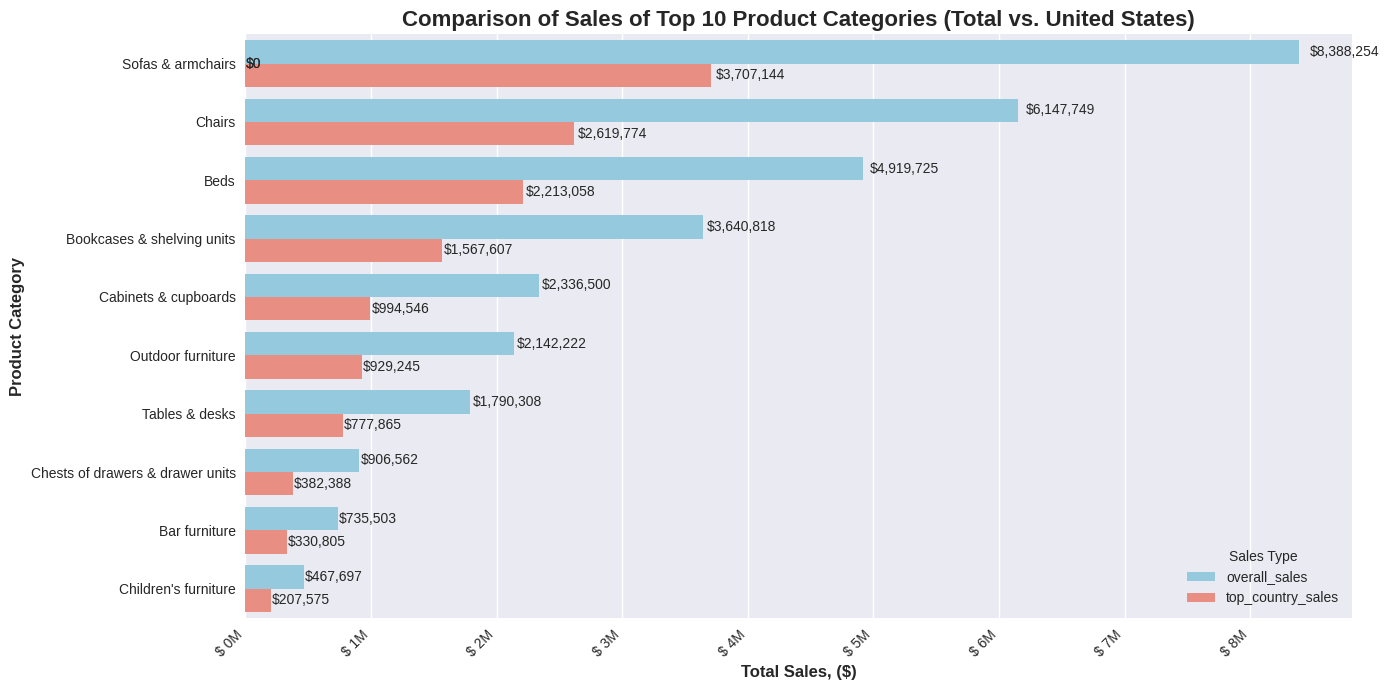

In [26]:
# Preparing Data for barplot
plot_data = top10_prod_categories.reset_index()[["category", "total_sales"]].copy()   # copying data to avoid changes in original dataframe
plot_data = plot_data.rename(columns = {"total_sales": "overall_sales"})

# Dictionary of sales by category for the top country for quick search
top_country_sales_dict = top10_prod_categories_top_country["total_sales"].to_dict()

# Adding sales from the top country using the category names from the general top
plot_data["top_country_sales"] = plot_data["category"].apply(
    lambda category: top_country_sales_dict.get(category, 0)  # returns 0 if the relevant category is not found in the dictionary
)

# Melting the DataFrame
# converting a DataFrame from a “wide” format to a “long” format
plot_data_melted = plot_data.melt(
    id_vars = "category",                                 # "category" remains as an identifier
    value_vars = ["overall_sales", "top_country_sales"],  # "total_sales" and "top_country_sales" are merged into one column of values
    var_name = "sales_type",                              # the names of the merged columns become the values of the new "sales_type" column
    value_name = "total_sales"                            # the values from the melted columns become the values of the new "total_sales" column
)


# Building barplot
plt.figure(figsize = (14, 7))
ax = sns.barplot(x = "total_sales", y = "category", hue = "sales_type", data = plot_data_melted, palette = {"overall_sales": "skyblue", "top_country_sales": "salmon"})

# Adding values to bars
for p in ax.patches:
    width = p.get_width()                       # getting the bar width
    plt.text(width*1.01,                        # x-axis value position
             p.get_y() + p.get_height() / 2,    # y-axis value position
             f"${width:,.0f}",                  # formatting value
             va = "center")

# Formatting x-axis
ax_axes = ax.axes
ax_axes.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"$ {x/1e6:.0f}M"))

plt.title(f"Comparison of Sales of Top 10 Product Categories (Total vs. {top_country_total_sales})", fontsize = 16, fontweight = "bold")
plt.xlabel("Total Sales, ($)", fontsize = 12, fontweight = "bold")
plt.ylabel("Product Category", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 45, ha = "right")
plt.legend(title = "Sales Type")
plt.tight_layout()
plt.show()

#### Sales Analysis by Device Type and Model (% of Total Sales)

In [27]:
# Total Sales
total_sales = df["price"].sum()

In [28]:
# Sales by Device Type
device_sales = df.groupby("device")["price"].sum().reset_index() # resetting index to convert a Series back to a DataFrame

# Percentage of Total Sales
device_sales["percentage"] = (device_sales["price"] / total_sales) * 100
device_sales_sorted = device_sales.sort_values(by = "percentage", ascending = False)

print(device_sales_sorted)

    device       price  percentage
0  desktop  18864039.0   59.002245
1   mobile  12384225.8   38.734924
2   tablet    723466.3    2.262831


In [29]:
# Sales by Model Type
model_sales = df.groupby("mobile_model_name")["price"].sum().reset_index()

# Percentage of Total Sales
model_sales["percentage"] = (model_sales["price"] / total_sales) * 100
model_sales_sorted = model_sales.sort_values(by = "percentage", ascending = False)

print(model_sales_sorted)

  mobile_model_name      price  percentage
1            Chrome  8899523.9   27.835602
0           <Other>  6535330.8   20.440966
7            Safari  6491062.1   20.302504
9            iPhone  6420776.3   20.082667
2        ChromeBook  1830458.7    5.725241
3              Edge   697222.3    2.180746
8              iPad   448854.2    1.403910
4           Firefox   421066.9    1.316998
6        Pixel 4 XL   118287.7    0.369976
5           Pixel 3   109148.2    0.341390


In [30]:
# Sales by Device Type and Model Name
device_model_sales = df.groupby(["device", "mobile_model_name"])["price"].sum().reset_index()

# Percentage of Total Sales
device_model_sales["percentage"] = (device_model_sales["price"] / total_sales) * 100
device_model_sales_sorted = device_model_sales.sort_values(by = "percentage", ascending = False)

print(device_model_sales_sorted)

     device mobile_model_name      price  percentage
1   desktop            Chrome  8899523.9   27.835602
5   desktop            Safari  6490467.1   20.300643
11   mobile            iPhone  6420776.3   20.082667
6    mobile           <Other>  5735073.6   17.937951
2   desktop        ChromeBook  1830458.7    5.725241
3   desktop              Edge   696877.3    2.179667
0   desktop           <Other>   525645.1    1.644093
13   tablet              iPad   448854.2    1.403910
4   desktop           Firefox   421066.9    1.316998
12   tablet           <Other>   274612.1    0.858922
9    mobile        Pixel 4 XL   118287.7    0.369976
8    mobile           Pixel 3   109148.2    0.341390
10   mobile            Safari      595.0    0.001861
7    mobile              Edge      345.0    0.001079


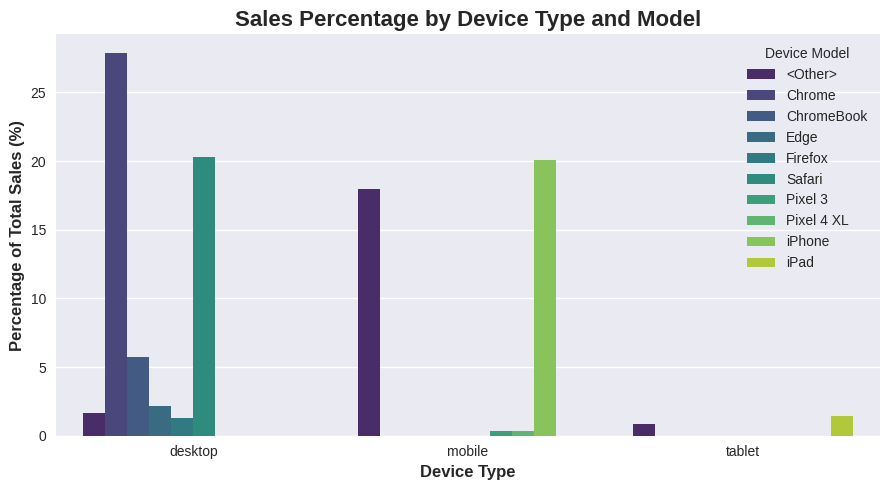

In [31]:
# Sales Analysis by Device Type and Model (% of Total Sales) Plot
plt.figure(figsize=(9, 5))

sns.barplot(x = "device", y = "percentage", hue = "mobile_model_name", palette = "viridis",  data = device_model_sales,
            dodge = True) # dodge places the columns for models for each type of device next to each other, not one after the other

plt.title("Sales Percentage by Device Type and Model", fontsize = 16, fontweight = "bold")
plt.xlabel("Device Type", fontsize = 12, fontweight = "bold")
plt.ylabel("Percentage of Total Sales (%)", fontsize = 12, fontweight = "bold")
plt.legend(title = "Device Model")
plt.tight_layout()
plt.show()

#### Analysis of the Behavior (in Terms of Sales) of Customers Who Unsubscribed and Those Who are Still Subscribed

In [32]:
# Grouping data for subscribed and unsubscribed customers
subscription_data = df.groupby("is_unsubscribed").agg(
    total_sales = ("price", "sum"),
    orders_cnt = ("price", "count"),
    #avg_sales = ("price", "mean")
    avg_sales = ("price",lambda x: x.mean().round(1))
).reset_index()

# Adding "% of total" columns
total_overall_sales = df["price"].sum()
total_overall_orders = df["price"].count()

subscription_data["%_of_total_sales"] = subscription_data["total_sales"] / total_overall_sales * 100
subscription_data["%_of_total_orders"] = subscription_data["orders_cnt"] / total_overall_orders * 100
subscription_data["subscription_status"] = subscription_data["is_unsubscribed"].map({0: "Subscribed", 1: "Unsubscribed"})

print(f"Subscription Data:\n {subscription_data}")

Subscription Data:
    is_unsubscribed  total_sales  orders_cnt  avg_sales  %_of_total_sales  \
0                0    2150796.9        2334      921.5          6.727183   
1                1     431721.6         447      965.8          1.350323   

   %_of_total_orders subscription_status  
0           6.959270          Subscribed  
1           1.332817        Unsubscribed  


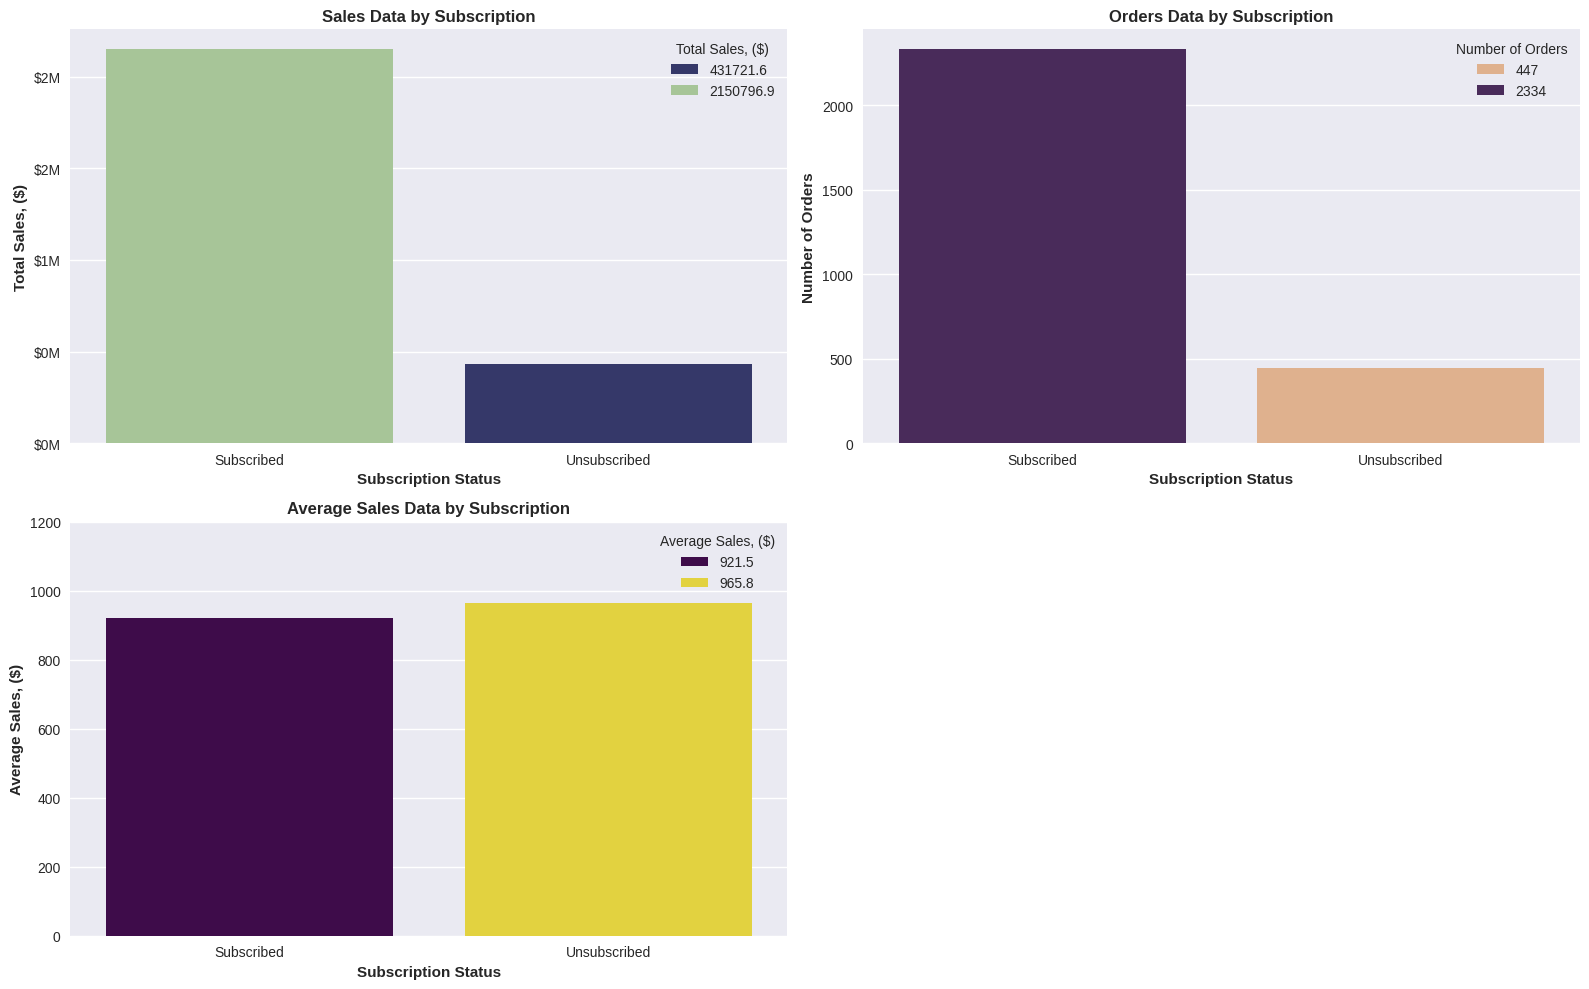

In [140]:
# Data Visualization
plt.figure(figsize = (16, 10))



# Total Sales Comparison
plt.subplot(2,2,1)
sales_plot = sns.barplot(x = "subscription_status", y = "total_sales", data = subscription_data, hue = "total_sales", palette = "crest_r")
# Formatting y-axis
ax_sales_plot = sales_plot.axes
ax_sales_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e6:.0f}M"))

plt.title("Sales Data by Subscription", fontweight = "bold")
plt.xlabel("Subscription Status", fontweight = "bold")
plt.ylabel("Total Sales, ($)", fontweight = "bold")
plt.legend(title = "Total Sales, ($)")
plt.tight_layout()



# Total Sales Comparison
plt.subplot(2,2,2)
orders_plot = sns.barplot(x = "subscription_status", y = "orders_cnt", data = subscription_data, hue = "orders_cnt", palette = "flare")

plt.title("Orders Data by Subscription", fontweight = "bold")
plt.xlabel("Subscription Status", fontweight = "bold")
plt.ylabel("Number of Orders", fontweight = "bold")
plt.legend(title = "Number of Orders")
plt.tight_layout()



# Average Sales Comparison
plt.subplot(2,2,3)
avg_sales_plot = sns.barplot(x = "subscription_status", y = "avg_sales", data = subscription_data, hue = "avg_sales", palette = "viridis")

plt.legend(title = "Average Sales, ($)")
plt.title("Average Sales Data by Subscription", fontweight = "bold")
plt.xlabel("Subscription Status", fontweight = "bold")
plt.ylabel("Average Sales, ($)", fontweight = "bold")
plt.ylim(0, 1200)
plt.tight_layout()

plt.show()

#### Countries With the Largest Number of Registered Users

In [34]:
# Grouping Account Data by Countries
country_registration = df.groupby("country")["account_id"].count().sort_values(ascending = False).reset_index()
country_with_registration = country_registration[country_registration["account_id"] != 0].copy()

# % of Total Accounts
total_accounts = country_with_registration["account_id"].sum()
country_with_registration["%_of_total_accounts"] = country_with_registration["account_id"] / total_accounts * 100

In [35]:
print(country_with_registration)
print(total_accounts)

           country  account_id  %_of_total_accounts
0    United States        1207            43.401654
1            India         246             8.845739
2           Canada         207             7.443366
3   United Kingdom          88             3.164329
4           France          56             2.013664
..             ...         ...                  ...
81        Honduras           1             0.035958
82          Jordan           1             0.035958
83            Iraq           1             0.035958
84         Belarus           1             0.035958
85     El Salvador           1             0.035958

[86 rows x 3 columns]
2781


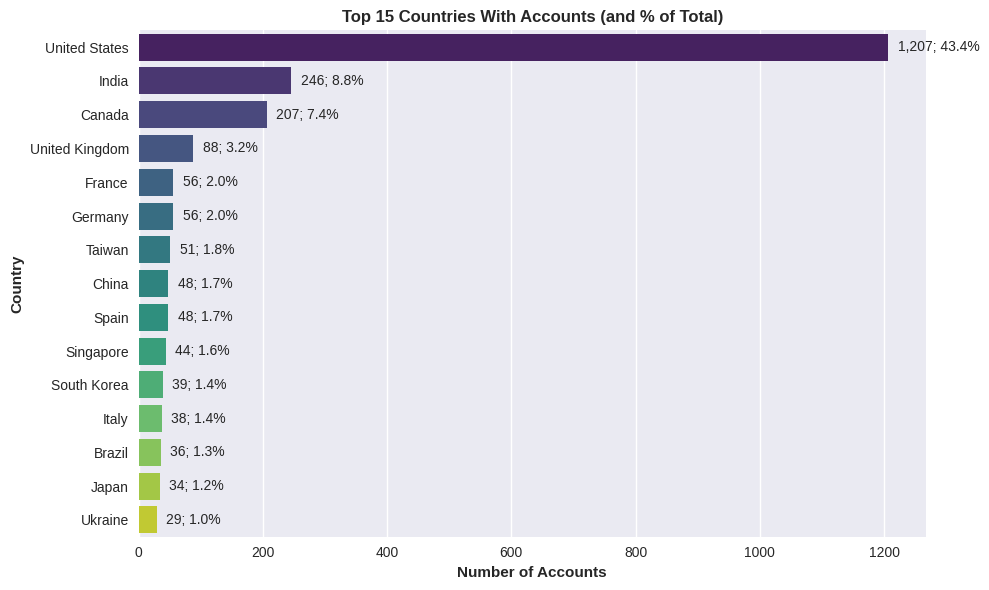

In [36]:
# Plotting Data
plt.figure(figsize = (10,6))

plot_data = country_with_registration.head(15)
country_account_plot = sns.barplot(x = "account_id", y = "country", data = plot_data, hue = "country", palette = "viridis")

# Adding values to bars
for index, p in enumerate(country_account_plot.patches):
    width = p.get_width()                       # getting the bar width
    percentage_of_total = plot_data.iloc[index]["%_of_total_accounts"]
    plt.text(width + 15,                        # x-axis value position
             p.get_y() + p.get_height() / 2,    # y-axis value position
             f"{width:,.0f}; {percentage_of_total:,.1f}%",                  # formatting value
             va = "center")

plt.title("Top 15 Countries With Accounts (and % of Total)", fontweight = "bold")
plt.xlabel("Number of Accounts", fontweight = "bold")
plt.ylabel("Country", fontweight = "bold")
plt.tight_layout()
plt.show()

### 2.2.3. Sales Dynamics Analysis

#### General Dynamics

In [37]:
# Daily Sales
daily_sales = df.groupby("order_date")["price"].sum().reset_index()
daily_orders = df.groupby("order_date")["price"].count().reset_index()

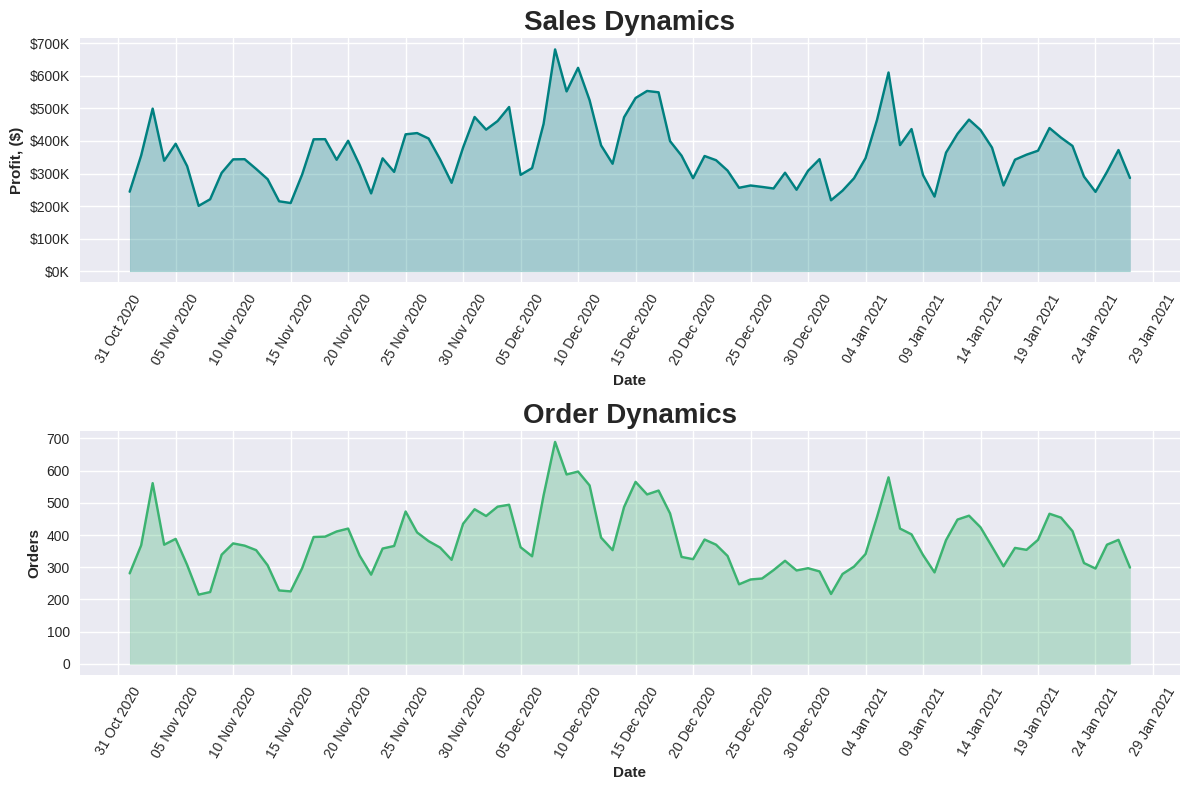

In [38]:
import matplotlib.dates as mdates

# Plotting Daily Sales Data
plt.figure(figsize = (12,8))


# Sales Dynamics
plt.subplot(2,1,1)
daily_sales_plot = sns.lineplot(data = daily_sales, x = "order_date", y = "price", color = "teal")

# Filling area under the curve
plt.fill_between(x = daily_sales["order_date"], y1 = daily_sales["price"], color = "teal", alpha = 0.3)

# Formatting x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))   # setting axis format
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 5))      # setting date interval for every 5 days
# Formatting y-axis
ax_daily_sales_plot = daily_sales_plot.axes
ax_daily_sales_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e3:.0f}K"))

plt.title("Sales Dynamics", weight = "bold", fontsize = 20)
plt.xlabel("Date", weight = "bold")
plt.ylabel("Profit, ($)", weight = "bold")
plt.xticks(rotation = 60)
plt.tight_layout()


# Order Dynamics
plt.subplot(2,1,2)
daily_order_plot = sns.lineplot(data = daily_orders, x = "order_date", y = "price", color = "mediumseagreen")

# Filling area under the curve
plt.fill_between(x = daily_orders["order_date"], y1 = daily_orders["price"], color = "mediumseagreen", alpha = 0.3)

# Formatting x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))   # setting axis format
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 5))      # setting date interval for every 5 days

plt.title("Order Dynamics", weight = "bold", fontsize = 20)
plt.xlabel("Date", weight = "bold")
plt.ylabel("Orders", weight = "bold")
plt.xticks(rotation = 60)
plt.tight_layout()

plt.show()

General Sales and order dynamics are quite stable. There are peaks in the beginning of December 2020.

#### Orders by Day of the Week + Seasonality

In [39]:
# Extracting the day of week from the order date
df["order_day_of_week"] = df["order_date"].dt.day_name()
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [40]:
# Number of orders for each day of the week
orders_per_day = df["order_day_of_week"].value_counts()

# Number of unique dates for each day of the week
unique_dates_per_day = df.groupby("order_day_of_week")["order_date"].nunique()

# Average number of orders per day of the week
average_orders_weekday = orders_per_day / unique_dates_per_day
average_orders_weekday = average_orders_weekday.reindex(weekday_order)

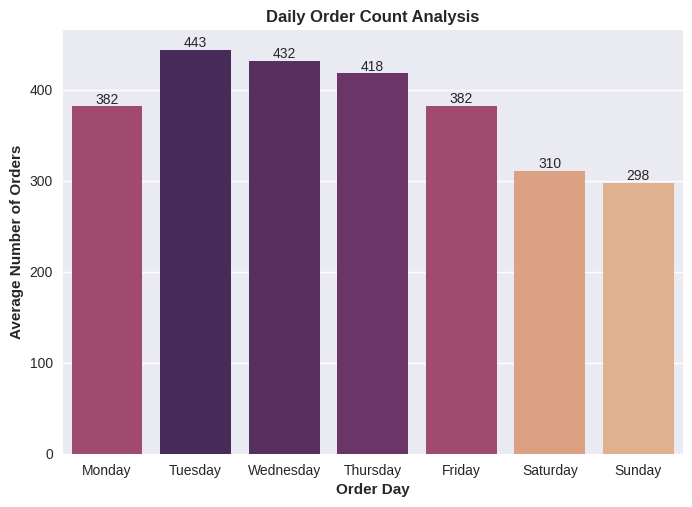

In [41]:
# Plotting Data
plt.figure()

bars = sns.barplot(x = average_orders_weekday.index,
            y = average_orders_weekday.values,
            hue = average_orders_weekday.values,
            order = weekday_order,
            palette = "flare",
            legend = False)

# Formatting x and y axes
ax = bars.axes
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.0f}",
        ha = "center", va = "bottom")

plt.title("Daily Order Count Analysis", weight = "bold")
plt.xlabel("Order Day", weight = "bold")
plt.ylabel("Average Number of Orders", weight = "bold")

plt.show()

Based on available data, Tuesday, Wednesday, and Thursday are the days of the week with the statistically highest number of orders.  
The lowest number of orders is on Sunday and Saturday.

#### Dynamics by Continents

In [42]:
# Sales by Continent Data
continents = df["continent"].unique()
print(f"All Continents:\n{continents}")

# We need to analyze dynamics for Americas, Asia, and Europe
selected_continents = ["Americas", "Asia", "Europe"]

sales_by_continent = df.groupby(["continent", "order_date"])["price"].sum().reset_index()                     # Sales for all continents
filtered_sales_by_continent = sales_by_continent[sales_by_continent["continent"].isin(selected_continents)]   # Sales for chosen continents

# Checking if all three continents are selected
filtered_continents = filtered_sales_by_continent["continent"].unique()
print(f"Continents in filtered data:\n{filtered_continents}")

All Continents:
['Americas' 'Asia' 'Europe' 'Africa' 'Oceania' '(not set)']
Continents in filtered data:
['Americas' 'Asia' 'Europe']


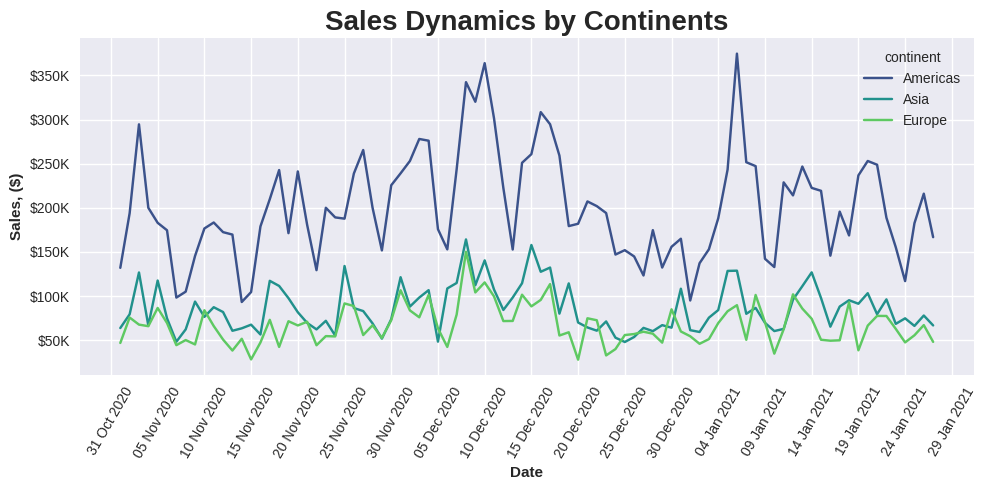

In [43]:
# Plotting Data
plt.figure(figsize = (10,5))

continent_sales_plot = sns.lineplot(x = "order_date", y = "price", data = filtered_sales_by_continent, hue = "continent", palette = "viridis")

# Formatting x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))   # setting axis format
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 5))      # setting date interval for every 5 days

# Formatting y-axis
ax_continent_sales_plot = continent_sales_plot.axes
ax_continent_sales_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e3:.0f}K"))

plt.title("Sales Dynamics by Continents", weight = "bold", fontsize = 20)
plt.xlabel("Date", weight = "bold")
plt.ylabel("Sales, ($)", weight = "bold")
plt.xticks(rotation = 60)
plt.tight_layout()

plt.show()


Sales dynamics for Americas, Asia, and Europe has almost the same behaviour taking into account the scale difference.  
Americas has the highest sales dynamics, Europe and Asia are nearly equal.


#### Dynamics by Sales Channels

In [44]:
# Sales by Sales Channel Data
sales_by_channel = df.groupby(["channel", "order_date"])["price"].sum().reset_index()

In [45]:
# Dividing Channels for better erception of plots
channels = df["channel"].unique()
first_channel_part = channels[:3]
second_channel_part = channels[3:]

first_data_part = sales_by_channel[sales_by_channel["channel"].isin(first_channel_part)]
second_data_part = sales_by_channel[sales_by_channel["channel"].isin(second_channel_part)]

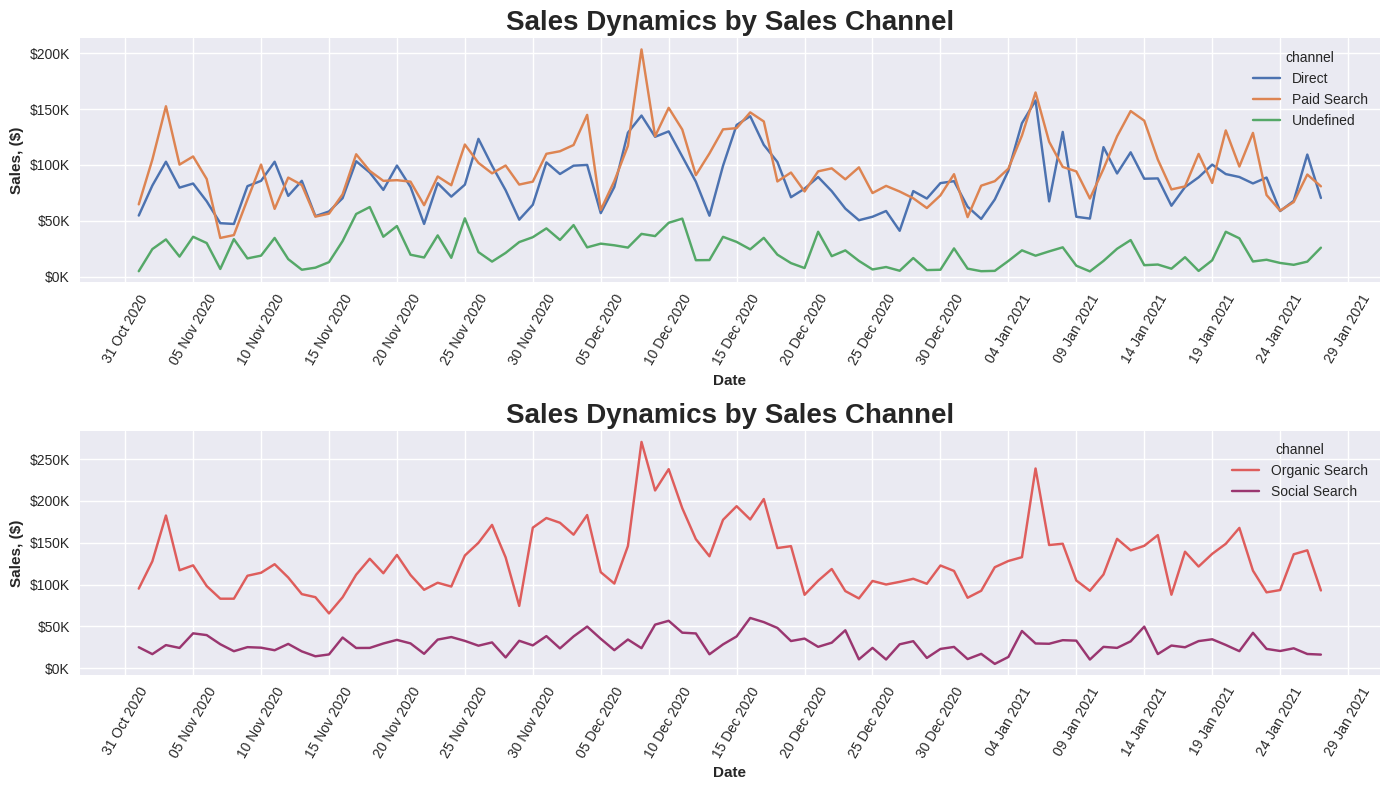

In [46]:
# Plotting Data
plt.figure(figsize = (14,8))

# First three channels
plt.subplot(2,1,1)

sales_channel_plot = sns.lineplot(x = "order_date", y = "price", data = first_data_part, hue = "channel", palette = "deep")

# Formatting x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))   # setting axis format
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 5))      # setting date interval for every 5 days
# Formatting y-axis
ax_channel_sales_plot = sales_channel_plot.axes
ax_channel_sales_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e3:.0f}K"))

plt.title("Sales Dynamics by Sales Channel", weight = "bold", fontsize = 20)
plt.xlabel("Date", weight = "bold")
plt.ylabel("Sales, ($)", weight = "bold")
plt.xticks(rotation = 60)
plt.tight_layout()


# Second two channels
plt.subplot(2,1,2)

sales_channel_plot = sns.lineplot(x = "order_date", y = "price", data = second_data_part, hue = "channel", palette = "flare")

# Formatting x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))   # setting axis format
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 5))      # setting date interval for every 5 days
# Formatting y-axis
ax_channel_sales_plot = sales_channel_plot.axes
ax_channel_sales_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e3:.0f}K"))

plt.title("Sales Dynamics by Sales Channel", weight = "bold", fontsize = 20)
plt.xlabel("Date", weight = "bold")
plt.ylabel("Sales, ($)", weight = "bold")
plt.xticks(rotation = 60)
plt.tight_layout()

plt.show()

For Direct, Paid Search, and Organic Search, sales data has nearly the same high dynamics.  
For Social Search and Undefined channels, the dynamics is times lower.  

Descending list of sales dynamics for Channels:
1. Organic Search
2. Paid Search
3. Direct
4. Social Search

#### Dynamics by Device

In [47]:
# Sales by Device Data
sales_by_device = df.groupby(["device", "order_date"])["price"].sum().reset_index()

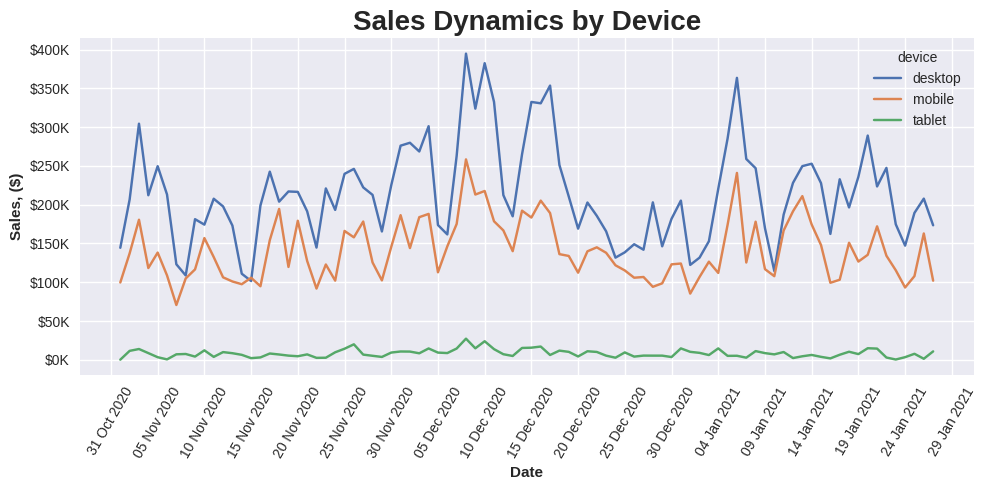

In [48]:
# Plotting Data
plt.figure(figsize = (10,5))

sales_device_plot = sns.lineplot(x = "order_date", y = "price", data = sales_by_device, hue = "device", palette = "deep")

# Formatting x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))   # setting axis format
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 5))      # setting date interval for every 5 days
# Formatting y-axis
ax_device_sales_plot = sales_device_plot.axes
ax_device_sales_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e3:.0f}K"))

plt.title("Sales Dynamics by Device", weight = "bold", fontsize = 20)
plt.xlabel("Date", weight = "bold")
plt.ylabel("Sales, ($)", weight = "bold")
plt.xticks(rotation = 60)
plt.tight_layout()

- The highest dynamics is for desktop devices;
- The lowest dynamics is for tablets;
- Dynamics for desktop and mobile have similar trends.

### 2.2.4. Pivot Tables

#### Sessions by Traffic Channels and Device Types

In [49]:
# Unique values of traffic channels and devices
channels = df["channel"].unique()
devices = df["device"].unique()
print(f"Traffic Channels:\n{channels}\nDevices:\n{devices}")

Traffic Channels:
['Undefined' 'Paid Search' 'Direct' 'Organic Search' 'Social Search']
Devices:
['desktop' 'mobile' 'tablet']


In [50]:
# Excluding "Undefined" channel from data to analyze
channel_device_data = df[~df["channel"].isin(["Undefined"])].reset_index()

# Checking if filtering is done correctly
filtered_channels = channel_device_data["channel"].unique()
print(filtered_channels)

['Paid Search' 'Direct' 'Organic Search' 'Social Search']


In [51]:
# Buolding Pivot Table
pivot_channel_device = pd.pivot_table(
    data = channel_device_data,
    values = "ga_session_id",
    index = "channel",
    columns = "device",
    aggfunc = "nunique",
    fill_value = 0)

In [52]:
# Styling pivot table
styled_pivot = pivot_channel_device.style.set_table_styles([{'selector': 'th, td', 'props': [('border', '1px solid black')]}]).set_caption("Sessions by Sales Channel and Device")
styled_pivot

device,desktop,mobile,tablet
channel,,,
Direct,4655,2985,160
Organic Search,7011,4655,255
Paid Search,5261,3574,207
Social Search,1594,1065,57


Most orders come through the organic channel from desktop versions.

#### Total Sales by Product Category (Top 10 Categories) in Different Countries (Top 5 Countries)

In [53]:
# Top 10 Categories by Total Sales
top_10_categories = df.groupby("category")["price"].sum().nlargest(10).index

# Top 5 Countries by Total Sales
top_5_countries = df.groupby("country")["price"].sum().nlargest(5).index

In [54]:
# Filtering Data
category_country_data = df[df["category"].isin(top_10_categories) & df["country"].isin(top_5_countries)]

# Creating pivot table
pivot_category_country = pd.pivot_table(
    data = category_country_data,
    values = "ga_session_id",
    index = "category",
    columns = "country",
    aggfunc = "nunique",
    fill_value = 0)

In [55]:
print("Total Sales by Product Category (Top 10 Categories) in Different Countries (Top 5 Countries)\n")
print(pivot_category_country.to_markdown())

Total Sales by Product Category (Top 10 Categories) in Different Countries (Top 5 Countries)

| category                         |   Canada |   France |   India |   United Kingdom |   United States |
|:---------------------------------|---------:|---------:|--------:|-----------------:|----------------:|
| Bar furniture                    |       83 |       17 |      96 |               34 |             487 |
| Beds                             |      218 |       56 |     236 |               97 |            1298 |
| Bookcases & shelving units       |      591 |      144 |     734 |              232 |            3374 |
| Cabinets & cupboards             |      184 |       51 |     201 |               77 |             995 |
| Chairs                           |      450 |      116 |     539 |              177 |            2576 |
| Chests of drawers & drawer units |      113 |       32 |     129 |               55 |             616 |
| Children's furniture             |      116 |       46 |

**Top-3 largest number of orders**  
1) United States, category: Bookcases & Shelving Units  
2) United States, category: Chairs  
3) United States, category: Sofas & Armchairs

___

**Top Category in Top-5 Countries**  
1) United States, category: Bookcases & Shelving Units  
2) India, category: Bookcases & Shelving Units  
3) Canada, category: Bookcases & Shelving Units   
4) United Kingdom, category: Bookcases & Shelving Units   
5) France, category: Bookcases & Shelving Units

#### Average Order Price by Category and Device Type

In [56]:
# Building pivot table
pivot_price_category_device = pd.pivot_table(
    data = df,
    values = "price",
    index = "category",
    columns = "device",
    aggfunc = "mean",
    fill_value = 0
)

sorted_pivot = pivot_price_category_device.sort_values(by = ["desktop", "mobile", "tablet"], ascending = [False, False, False])

print("Average Order Price by Category and Device Type")
print(sorted_pivot.to_markdown())

Average Order Price by Category and Device Type
| category                             |   desktop |   mobile |   tablet |
|:-------------------------------------|----------:|---------:|---------:|
| Sofas & armchairs                    |  1939.86  | 1965.71  | 1954.04  |
| Beds                                 |  1708.85  | 1646.09  | 1612.55  |
| Chairs                               |  1058.55  |  984.076 | 1186.81  |
| Cabinets & cupboards                 |  1001.67  | 1006.66  | 1201.67  |
| Sideboards, buffets & console tables |   972.039 |  945.566 |  780     |
| Outdoor furniture                    |   958.848 |  961.094 | 1023.43  |
| Room dividers                        |   806.277 |  835.442 |  978     |
| Bar furniture                        |   668.83  |  686.379 |  583.077 |
| Chests of drawers & drawer units     |   627.391 |  617.686 |  668.259 |
| Tables & desks                       |   610.184 |  610.238 |  551.219 |
| Bookcases & shelving units           |   479.979 |

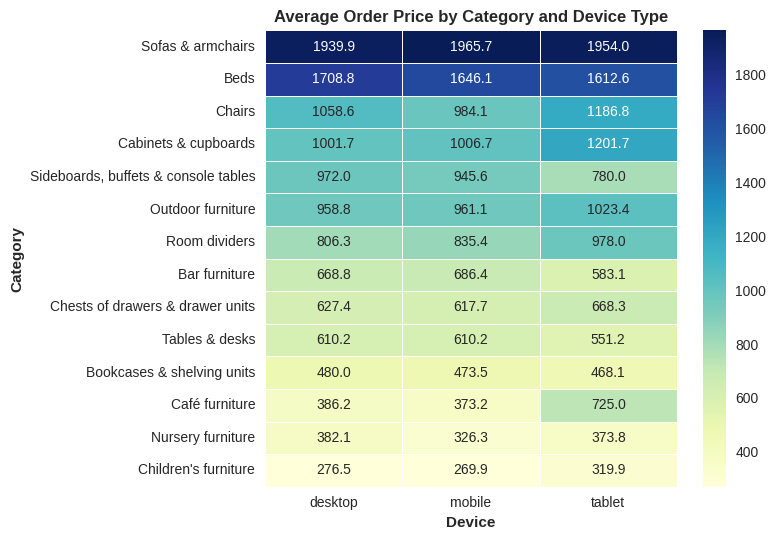

In [57]:
# Building the Heatmap
plt.figure()
sns.heatmap(sorted_pivot, cmap = "YlGnBu", annot = True, linewidths = 0.5, fmt = ".1f")

plt.title("Average Order Price by Category and Device Type", weight = "bold")
plt.xlabel("Device", weight = "bold")
plt.ylabel("Category", weight = "bold")
plt.tight_layout()
plt.show()

The average price by category and device is almost similarly distributed, so users ***do not*** tend to buy more expensive products in certain categories depending on the type of device.   
The exception is the "Café furniture" category, where the average purchase price is twice as high as on other devices. But it also possible that there is lack of data because "Café furniture" category is not in top-10 categories by total sales. There is lack of data for making any conclusion.

# 3. Statistical Data Analysis

## 3.1. Statistical Correlation Analysis

### 3.1.1. Number of Sessions and Total Sales per Date

In [58]:
# Grouping Data
daily_metrics = df.groupby("order_date").agg(
    session_cnt = ("ga_session_id", "nunique"),
    total_sales = ("price", "sum")).reset_index()

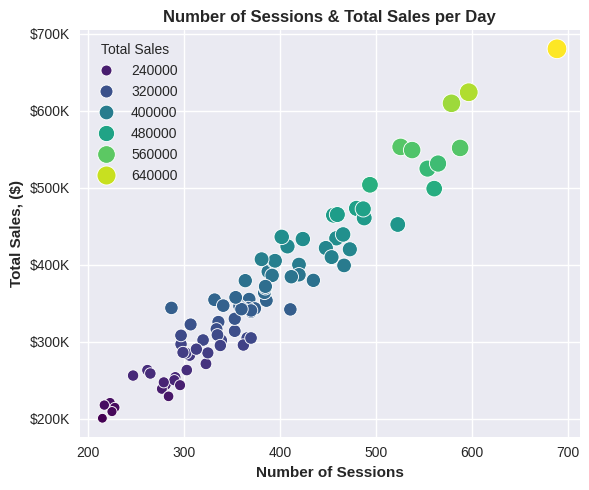

In [59]:
# Plotting Data
plt.figure(figsize = (6,5))

daily_metrics_plot = sns.scatterplot(
    data = daily_metrics,
    x = "session_cnt",
    y = "total_sales",
    hue = "total_sales",
    palette = "viridis",
    size = "total_sales",
    sizes = (50,200)
)

# Formatting y-axis
ax_daily_metrics_plot = daily_metrics_plot.axes
ax_daily_metrics_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e3:.0f}K"))

plt.title("Number of Sessions & Total Sales per Day", fontweight = "bold")
plt.xlabel("Number of Sessions", fontweight = "bold")
plt.ylabel("Total Sales, ($)", fontweight = "bold")
plt.legend(title = "Total Sales")
plt.tight_layout()

plt.show()

In [60]:
# Сhecking whether the data is normally distributed
# Normality tests
from scipy.stats import normaltest, shapiro

# Normaltest
_, p_value_normaltest_sales = normaltest(daily_metrics["total_sales"])
_, p_value_normaltest_session = normaltest(daily_metrics["session_cnt"])

# Shapiro-Wilk test
_, p_value_shapiro_sales = shapiro(daily_metrics["total_sales"])
_, p_value_shapiro_session = shapiro(daily_metrics["session_cnt"])

# Test results
print(f"Total Sales:\nNormaltest p-value: {p_value_normaltest_sales:.5f}\nShapiro-Wilk p-value: {p_value_shapiro_sales:.5f}\n")
print(f"Session Count:\nNormaltest p-value: {p_value_normaltest_session:.5f}\nShapiro-Wilk p-value: {p_value_shapiro_session:.5f}\n")

if p_value_normaltest_sales > 0.05:
  print("Normaltest:\nTotal Sales data has normal distribution")
else:
  print("Normaltest:\nTotal Sales data doesn't have normal distribution")

if p_value_normaltest_session > 0.05:
  print("Session Count data has normal distribution\n")
else:
  print("Session Count data doesn't have normal distribution\n")

if p_value_shapiro_sales > 0.05:
  print("Shapiro-Wilk test:\nTotal Sales data has normal distribution")
else:
  print("Shapiro-Wilk test:\nTotal Sales data doesn't have normal distribution")

if p_value_shapiro_session > 0.05:
  print("Session Count data has normal distribution\n")
else:
  print("Session Count data doesn't have normal distribution\n")

Total Sales:
Normaltest p-value: 0.00716
Shapiro-Wilk p-value: 0.00479

Session Count:
Normaltest p-value: 0.02338
Shapiro-Wilk p-value: 0.01311

Normaltest:
Total Sales data doesn't have normal distribution
Session Count data doesn't have normal distribution

Shapiro-Wilk test:
Total Sales data doesn't have normal distribution
Session Count data doesn't have normal distribution



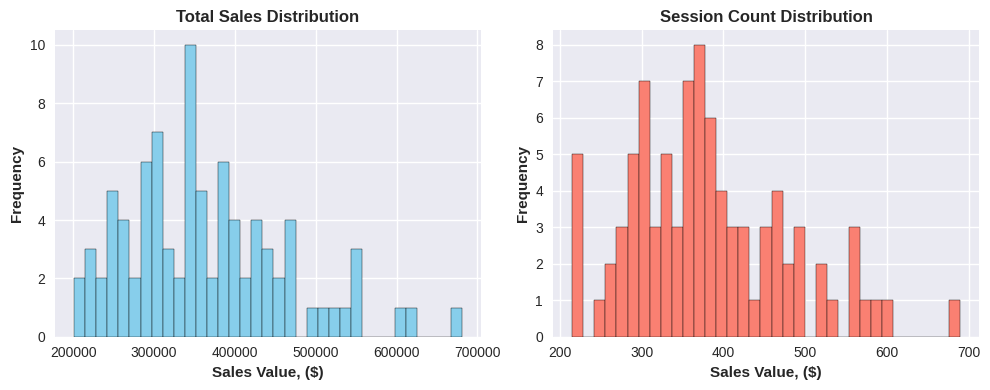

In [61]:
# Plotting histograms to visualize data distribution
plt.figure(figsize = (10,4))

# Total Sales Data
plt.subplot(1, 2, 1)
plt.hist(daily_metrics["total_sales"], bins = 35, color = "skyblue", edgecolor = "black")
plt.title("Total Sales Distribution", fontweight = "bold")
plt.ylabel("Frequency", fontweight = "bold")
plt.xlabel("Sales Value, ($)", fontweight = "bold")
plt.tight_layout()

# Session Count Data
plt.subplot(1, 2, 2)
plt.hist(daily_metrics["session_cnt"], bins = 35, color = "salmon", edgecolor = "black")
plt.title("Session Count Distribution", fontweight = "bold")
plt.ylabel("Frequency", fontweight = "bold")
plt.xlabel("Sales Value, ($)", fontweight = "bold")
plt.tight_layout()

plt.show()

Daily metrics data ***doesn't have a normal distribution***, so the **Spearman Rank Correlation** will be used to calculate the correlation coefficient.

In [62]:
from scipy.stats import spearmanr

# Calculating correlation coefficient with Spearman Rank Correlation

# Calculate p-value
session_sales_statistics, session_sales_p_value = spearmanr(daily_metrics["total_sales"], daily_metrics["session_cnt"])

if session_sales_p_value < 0.05:
  print(f"The correlation between total sales and session count is statistically significant.\nCorrelation Coefficient: {session_sales_statistics:.3f}")

# Determining the correlation direction
  if session_sales_p_value > 0:
    print("Positive correlation")
  elif session_sales_p_value < 0:
    print("Negative correlation")
  else:
    print("No linear correlation")

# Determining the strength of a correlation
  if session_sales_statistics == 0:
    print("No linear correlation")
  elif abs(session_sales_statistics) > 0 and  abs(session_sales_statistics) <= 0.33:
    print("Weak correlation")
  elif abs(session_sales_statistics) > 0.33 and  abs(session_sales_statistics) <= 0.66:
    print("Medium correlation")
  elif abs(session_sales_statistics) > 0.66 and  abs(session_sales_statistics) <= 0.99:
    print("Strong correlation")
  elif abs(session_sales_statistics) == 1:
    print("Perfect correlation")
  else:
    print("Correlation Coefficient Error")

else:
  print("The correlation between total sales and session count is not statistically significant.")

The correlation between total sales and session count is statistically significant.
Correlation Coefficient: 0.951
Positive correlation
Strong correlation


The correlation between Total Sales and Session Count has a ***strong positive*** statistically significant value.  
That means that as the Number of Sessions per day increases, Total Sales also increases.

### 3.1.2. Sales Correlation on Different Continents

In [63]:
# Grouping data
# Choosing top-3 continents by total sales
top_3_continents = df.groupby("continent")["price"].sum().nlargest(3).index.tolist()
# Data for top-3 continents
df_continent = df[df["continent"].isin(top_3_continents)]
continent_metrics = df_continent.groupby(["order_date", "continent"])["price"].sum().unstack(fill_value = 0) # expanding continents into columns

In [64]:
# Сhecking whether the data for each continent is normally distributed
# Normality tests

for continent in top_3_continents:
  sales = df_continent[df_continent["continent"].isin([continent])]["price"]
  stat_normaltest, p_value_normaltest = normaltest(sales)
  stat_shapiro, p_value_shapiro = shapiro(sales)

  if p_value_normaltest > 0.05:
    print(f"{continent}:\nNormaltest: Data has normal distribution, p-value: {p_value_normaltest}")
  else:
    print(f"{continent}:\nNormaltest: Data doesn't have normal distribution, p-value: {p_value_normaltest}")

  if p_value_shapiro > 0.05:
    print(f"Shapiro-Wilk test: Data has normal distribution, p-value: {p_value_shapiro}\n")
  else:
    print(f"Shapiro-Wilk test: Data doesn't have normal distribution, p-value: {p_value_shapiro}\n")

Americas:
Normaltest: Data doesn't have normal distribution, p-value: 0.0
Shapiro-Wilk test: Data doesn't have normal distribution, p-value: 5.682990918116109e-103

Asia:
Normaltest: Data doesn't have normal distribution, p-value: 0.0
Shapiro-Wilk test: Data doesn't have normal distribution, p-value: 5.934120715841868e-81

Europe:
Normaltest: Data doesn't have normal distribution, p-value: 0.0
Shapiro-Wilk test: Data doesn't have normal distribution, p-value: 2.1674006968693734e-75



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18553.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7950.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6261.
  res = hypotest_fun_out(*samples, **kwds)


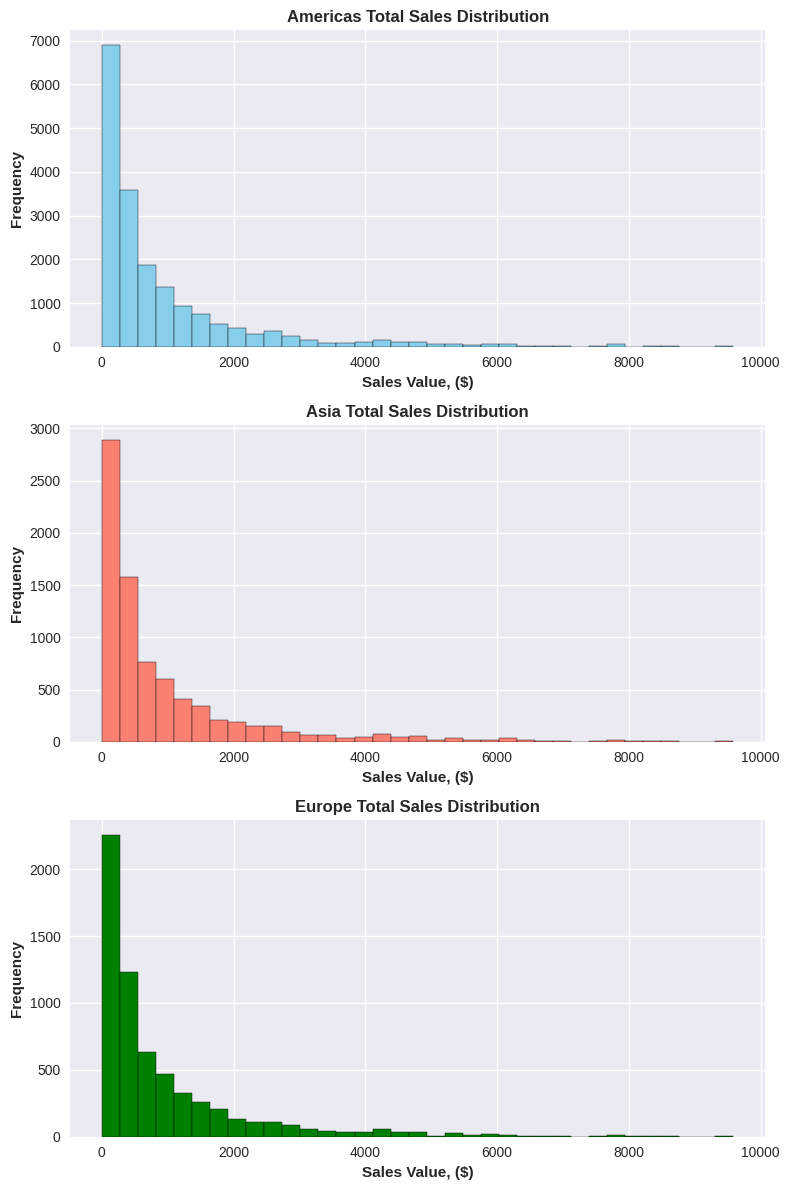

In [65]:
# Plotting histograms to visualize data distribution
colors = ["skyblue", "salmon", "green"]

fig, axes = plt.subplots(nrows = len(top_3_continents), ncols = 1, figsize = (8, 12))

for i, continent in enumerate(top_3_continents):
    continent_data = df_continent[df_continent["continent"].isin([continent])]["price"]
    axes[i].hist(continent_data, bins = 35, color = colors[i], edgecolor = "black")
    axes[i].set_title(f"{continent} Total Sales Distribution", fontweight = "bold")
    axes[i].set_ylabel("Frequency", fontweight = "bold")
    axes[i].set_xlabel("Sales Value, ($)", fontweight = "bold")
    plt.tight_layout()

plt.show()

Continent sales metrics data ***doesn't have a normal distribution***, so the **Spearman Rank Correlation** will be used to calculate the correlation coefficient.

In [66]:
# Calculating correlation coefficient with Spearman Rank Correlation
# Calculating correlation matrix
correlation_matrix = continent_metrics.corr(method = "spearman")
print(correlation_matrix)

continent  Americas      Asia    Europe
continent                              
Americas   1.000000  0.668539  0.625885
Asia       0.668539  1.000000  0.608221
Europe     0.625885  0.608221  1.000000


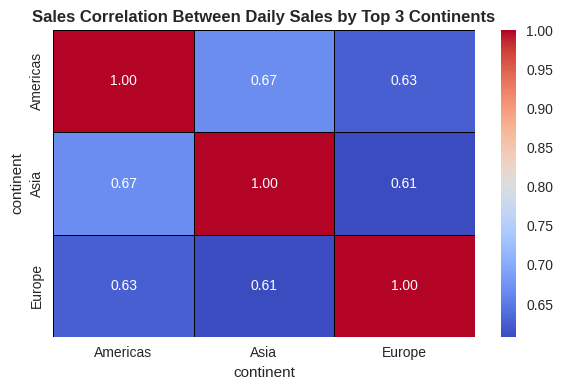

In [67]:
# Visualizing Correlation Matrix
plt.figure(figsize = (6, 4))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5, linecolor = "black")
plt.title("Sales Сorrelation Between Daily Sales by Top 3 Continents", fontweight = "bold")
plt.tight_layout()
plt.show()

In [68]:
# Analyzing the statistical significance of the correlation
# Statistical significance is calculated between data for pairs of continents
from itertools import combinations

continents_pairs = list(combinations(top_3_continents, 2))  # dividing continents into pairs
alpha = 0.05  # significance level

for cont1, cont2 in continents_pairs:
    sales1 = continent_metrics[cont1]
    sales2 = continent_metrics[cont2]
    correlation, p_value = spearmanr(sales1, sales2)
    print(f"\nCorrelation between Daily Sales in {cont1} and {cont2}:")
    print(f"  Spearman's Coefficient: {correlation:.3f}")
    print(f"  p-value: {p_value:.3e}")
    if p_value < alpha:
        print(f"  Correlation is statistically significant (p < {alpha:.2f}).")
    else:
        print(f"  Correlation is not statistically significant (p >= {alpha:.2f}).")
    # Determining the strength of a correlation
    if correlation == 0:
      print("  No linear correlation")
    elif abs(correlation) > 0 and  abs(correlation) <= 0.33:
      print("  Weak correlation")
    elif abs(correlation) > 0.33 and  abs(correlation) <= 0.66:
      print("  Medium correlation")
    elif abs(correlation) > 0.66 and  abs(correlation) <= 0.99:
      print("  Strong correlation")
    elif abs(correlation) == 1:
      print("  Perfect correlation")
    else:
      print("  Correlation Coefficient Error")


Correlation between Daily Sales in Americas and Asia:
  Spearman's Coefficient: 0.669
  p-value: 1.100e-12
  Correlation is statistically significant (p < 0.05).
  Strong correlation

Correlation between Daily Sales in Americas and Europe:
  Spearman's Coefficient: 0.626
  p-value: 7.009e-11
  Correlation is statistically significant (p < 0.05).
  Medium correlation

Correlation between Daily Sales in Asia and Europe:
  Spearman's Coefficient: 0.608
  p-value: 3.273e-10
  Correlation is statistically significant (p < 0.05).
  Medium correlation


According to the results, correlation among daily sales on the top-3 continents is positive and statistically significant, medium for Americas-Europe and Asia-Europe pairs, strong for Americas-Asia pair.

Conclusion:
- **Dependence between markets:** Finding a statistically significant positive correlation between sales on two continents may indicate that these markets are affected by similar global factors (e.g., seasonality, economic trends, multi-region marketing campaigns).

### 3.1.3. Correlation Between Sales Channel and Total Sales

In [69]:
# Sales by Sales Channels
channels = df["channel"].unique()
channel_metrics = df.groupby(["order_date", "channel"])["price"].sum().unstack(fill_value = 0) # expanding channels into columns

In [70]:
# Сhecking whether the data for each sales channel is normally distributed
# Normality tests

for channel in channels:
  sales = df["price"]
  stat_normaltest, p_value_normaltest = normaltest(sales)
  stat_shapiro, p_value_shapiro = shapiro(sales)

  if p_value_normaltest > 0.05:
    print(f"{channel} channel:\nNormaltest: Data has normal distribution, p-value: {p_value_normaltest}")
  else:
    print(f"{channel} channel:\nNormaltest: Data doesn't have normal distribution, p-value: {p_value_normaltest}")

  if p_value_shapiro > 0.05:
    print(f"Shapiro-Wilk test:Data has normal distribution, p-value: {p_value_shapiro}\n")
  else:
    print(f"Shapiro-Wilk test:Data doesn't have normal distribution, p-value: {p_value_shapiro}\n")

Undefined channel:
Normaltest: Data doesn't have normal distribution, p-value: 0.0
Shapiro-Wilk test:Data doesn't have normal distribution, p-value: 5.379096120563139e-118

Paid Search channel:
Normaltest: Data doesn't have normal distribution, p-value: 0.0
Shapiro-Wilk test:Data doesn't have normal distribution, p-value: 5.379096120563139e-118

Direct channel:
Normaltest: Data doesn't have normal distribution, p-value: 0.0
Shapiro-Wilk test:Data doesn't have normal distribution, p-value: 5.379096120563139e-118

Organic Search channel:
Normaltest: Data doesn't have normal distribution, p-value: 0.0
Shapiro-Wilk test:Data doesn't have normal distribution, p-value: 5.379096120563139e-118

Social Search channel:
Normaltest: Data doesn't have normal distribution, p-value: 0.0
Shapiro-Wilk test:Data doesn't have normal distribution, p-value: 5.379096120563139e-118



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 33538.
  res = hypotest_fun_out(*samples, **kwds)


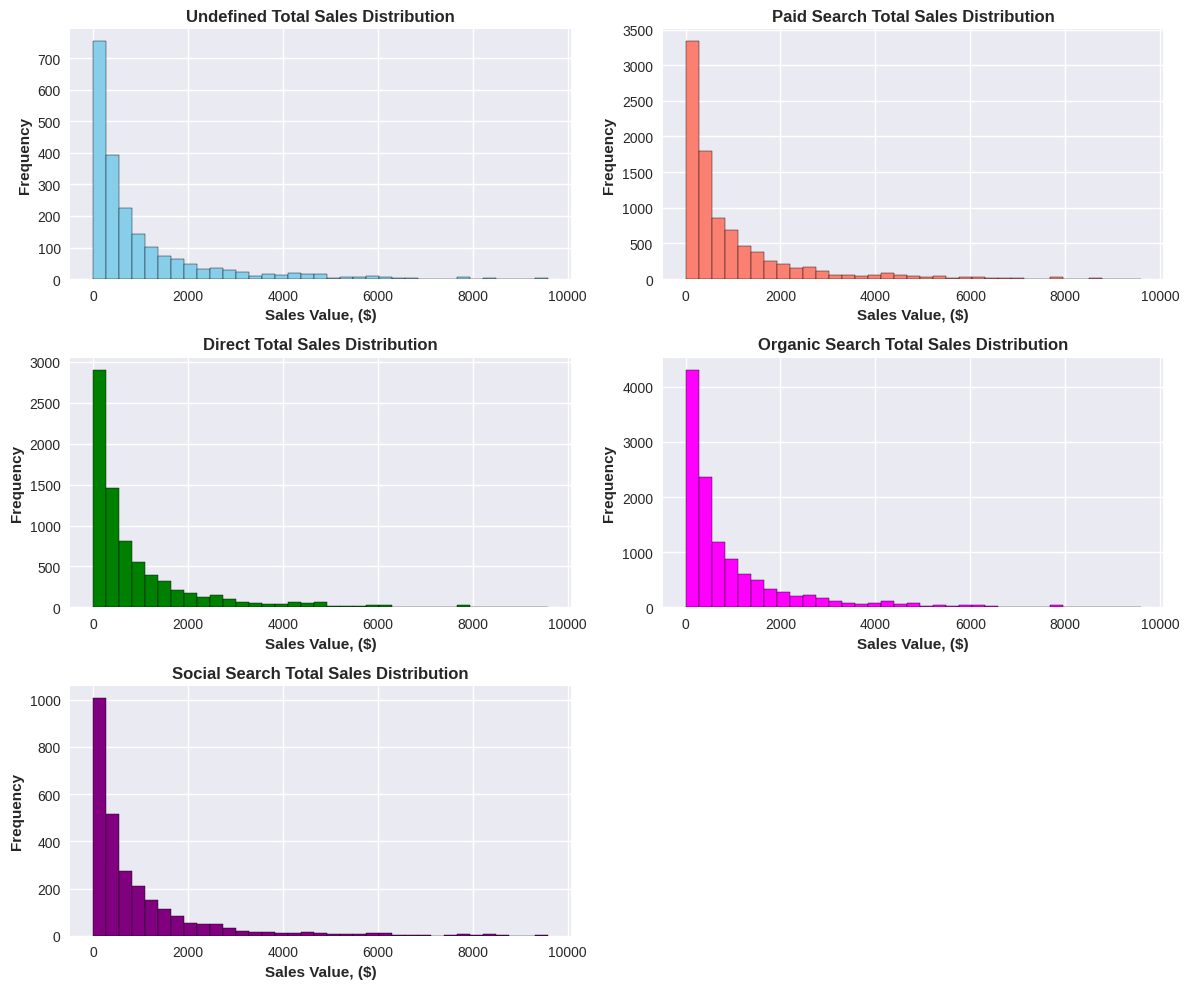

In [71]:
# Colors for plotting data
colors = ["skyblue", "salmon", "green", "magenta", "purple"]

# Figure for plotting data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Convert 2D array of axes to 1D

for i, channel in enumerate(channels):
    if i < len(axes):
        channel_data = df[df["channel"].isin([channel])]["price"]
        axes[i].hist(channel_data, bins = 35, color = colors[i], edgecolor = "black")
        axes[i].set_title(f"{channel} Total Sales Distribution", fontweight = "bold")
        axes[i].set_ylabel("Frequency", fontweight = "bold")
        axes[i].set_xlabel("Sales Value, ($)", fontweight = "bold")

plt.tight_layout()

# Remove an extra subplot if the number of channels is less than the number of axes
if len(channels) < len(axes):
    for j in range(len(channels), len(axes)):
        fig.delaxes(axes[j])

plt.show()

Sales Channels metrics data ***doesn't have a normal distribution***, so the **Spearman Rank Correlation** will be used to calculate the correlation coefficient.

In [72]:
# Calculating correlation coefficients with Spearman Rank Correlation
# Calculating correlation matrix
correlation_matrix = channel_metrics.corr(method = "spearman")
print(correlation_matrix)

channel           Direct  Organic Search  Paid Search  Social Search  \
channel                                                                
Direct          1.000000        0.748248     0.690782       0.393681   
Organic Search  0.748248        1.000000     0.763922       0.384770   
Paid Search     0.690782        0.763922     1.000000       0.420397   
Social Search   0.393681        0.384770     0.420397       1.000000   
Undefined       0.493748        0.456905     0.493255       0.385897   

channel         Undefined  
channel                    
Direct           0.493748  
Organic Search   0.456905  
Paid Search      0.493255  
Social Search    0.385897  
Undefined        1.000000  


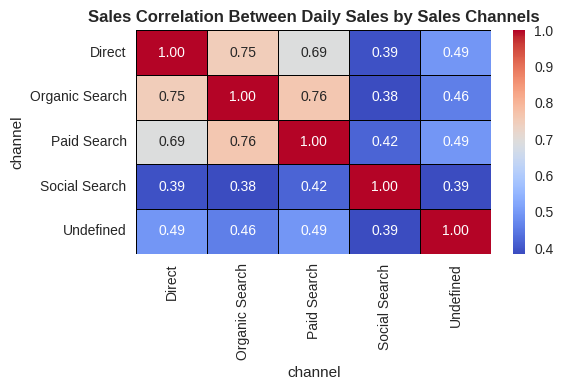

In [73]:
# Visualizing Correlation Matrix
plt.figure(figsize = (6, 4))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5, linecolor = "black")
plt.title("Sales Сorrelation Between Daily Sales by Sales Channels", fontweight = "bold")
plt.tight_layout()
plt.show()

In [74]:
# Analyzing the statistical significance of the correlation
# Statistical significance is calculated between data for pairs of channels

channel_pairs = list(combinations(channels, 2))  # dividing channels into pairs
alpha = 0.05  # significance level

for channel1, channel2 in channel_pairs:
    sales1 = channel_metrics[channel1]
    sales2 = channel_metrics[channel2]
    correlation, p_value = spearmanr(sales1, sales2)
    print(f"\nCorrelation between Daily Sales in {channel1} and {channel2}:")
    print(f"  Spearman's Coefficient: {correlation:.3f}")
    print(f"  p-value: {p_value:.3e}")
    if p_value < alpha:
        print(f"  Correlation is statistically significant (p < {alpha:.2f}).")
    else:
        print(f"  Correlation is not statistically significant (p >= {alpha:.2f}).")
    # Determining the strength of a correlation
    if correlation == 0:
      print("  No linear correlation")
    elif abs(correlation) > 0 and  abs(correlation) <= 0.33:
      print("  Weak correlation")
    elif abs(correlation) > 0.33 and  abs(correlation) <= 0.66:
      print("  Medium correlation")
    elif abs(correlation) > 0.66 and  abs(correlation) <= 0.99:
      print("  Strong correlation")
    elif abs(correlation) == 1:
      print("  Perfect correlation")
    else:
      print("  Correlation Coefficient Error")


Correlation between Daily Sales in Undefined and Paid Search:
  Spearman's Coefficient: 0.493
  p-value: 1.047e-06
  Correlation is statistically significant (p < 0.05).
  Medium correlation

Correlation between Daily Sales in Undefined and Direct:
  Spearman's Coefficient: 0.494
  p-value: 1.017e-06
  Correlation is statistically significant (p < 0.05).
  Medium correlation

Correlation between Daily Sales in Undefined and Organic Search:
  Spearman's Coefficient: 0.457
  p-value: 7.651e-06
  Correlation is statistically significant (p < 0.05).
  Medium correlation

Correlation between Daily Sales in Undefined and Social Search:
  Spearman's Coefficient: 0.386
  p-value: 2.047e-04
  Correlation is statistically significant (p < 0.05).
  Medium correlation

Correlation between Daily Sales in Paid Search and Direct:
  Spearman's Coefficient: 0.691
  p-value: 9.505e-14
  Correlation is statistically significant (p < 0.05).
  Strong correlation

Correlation between Daily Sales in Paid Se

According to the results, correlation among sales channels is positive and statistically significant, which indicates that there is a non-random relationship between the dynamics of sales through these channels:
- Medium correlation:
    - Undefined and all other sales channels (Paid Search, Direct, Organic Search, and Social Search)
    - Social Search and all other channels (Paid Search, Undefined, Direct, and Organic Search)
- Strong correlation:
    - Paid Search and Direct
    - Paid Search and Organic Search
    - Direct and Organic Search

**General observations:**
- Most of the correlations are of medium strength (Spearman's coefficient from ~0.38 to ~0.49).
- There are three pairs of channels with a strong positive correlation (from 0.691 to 0.748).

Conclusion:
- **Correlation between channels:** A positive correlation may indicate that certain traffic channels respond to the same external factors or have synergies. For example, a successful advertising campaign can increase sales both through direct traffic and paid advertising.

- The strong positive correlation between Paid Search, Direct, and Organic Search suggests that these three channels have similar sales dynamics.   
  When sales grow through one of these channels, they tend to grow through the others as well. This can be due to general market trends, seasonality, or the effectiveness of marketing campaigns that reinforce each other. Strong search advertising can increase brand awareness, leading to an increase in both organic traffic and direct engagements.


### 3.1.4. Sales Correlation on Product Categories

In [75]:
# Grouping data
# Choosing top-5 product categories by total sales
top_5_categories = df.groupby("category")["price"].sum().nlargest(5).index.tolist()

# Data for top-5 product categories
df_categories = df[df["category"].isin(top_5_categories)]
category_metrics = df_categories.groupby(["order_date", "category"])["price"].sum().unstack(fill_value = 0) # expanding categories into columns

In [76]:
# Сhecking whether the data for each category is normally distributed
# Normality tests

for category in top_5_categories:
  sales = df_categories[df_categories["category"].isin([category])]["price"]
  stat_normaltest, p_value_normaltest = normaltest(sales)
  stat_shapiro, p_value_shapiro = shapiro(sales)

  if p_value_normaltest > 0.05:
    print(f"{category} category:\nNormaltest: Data has normal distribution, p-value: {p_value_normaltest}")
  else:
    print(f"{category} category:\nNormaltest: Data doesn't have normal distribution, p-value: {p_value_normaltest}")

  if p_value_shapiro > 0.05:
    print(f"Shapiro-Wilk test: Data has normal distribution, p-value: {p_value_shapiro}\n")
  else:
    print(f"Shapiro-Wilk test: Data doesn't have normal distribution, p-value: {p_value_shapiro}\n")

Sofas & armchairs category:
Normaltest: Data doesn't have normal distribution, p-value: 1.3642063151785585e-168
Shapiro-Wilk test: Data doesn't have normal distribution, p-value: 9.158427651024574e-55

Chairs category:
Normaltest: Data doesn't have normal distribution, p-value: 0.0
Shapiro-Wilk test: Data doesn't have normal distribution, p-value: 2.508486004868061e-69

Beds category:
Normaltest: Data doesn't have normal distribution, p-value: 1.4484275656818103e-283
Shapiro-Wilk test: Data doesn't have normal distribution, p-value: 4.226840089196976e-56

Bookcases & shelving units category:
Normaltest: Data doesn't have normal distribution, p-value: 0.0
Shapiro-Wilk test: Data doesn't have normal distribution, p-value: 1.3185327936602137e-76

Cabinets & cupboards category:
Normaltest: Data doesn't have normal distribution, p-value: 1.902554247206226e-232
Shapiro-Wilk test: Data doesn't have normal distribution, p-value: 2.9851885688226635e-46



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5952.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7630.
  res = hypotest_fun_out(*samples, **kwds)


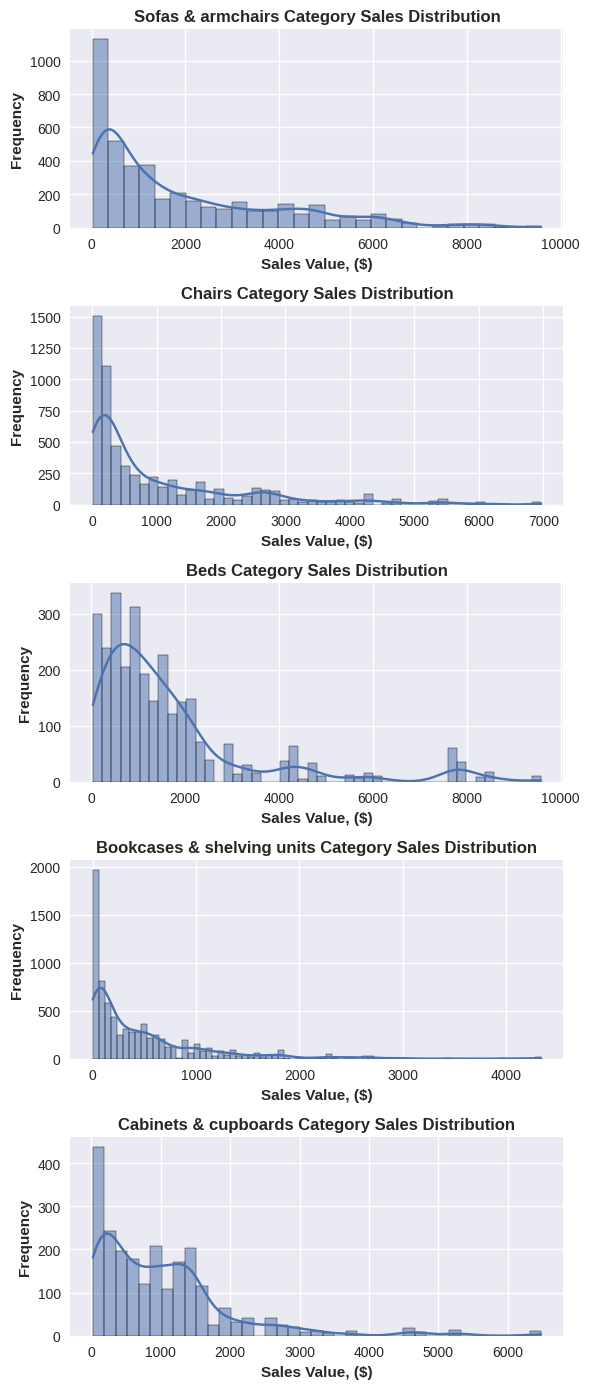

In [77]:
# Distribution Histograms
fig, axes = plt.subplots(nrows = len(top_5_categories), ncols = 1, figsize = (6, 14))

for i, category in enumerate(top_5_categories):
    subset = df_categories[df_categories["category"] == category]
    sns.histplot(subset["price"], kde = True, ax = axes[i])
    axes[i].set_title(f"{category} Category Sales Distribution", fontweight = "bold")
    axes[i].set_xlabel("Sales Value, ($)", fontweight = "bold")
    axes[i].set_ylabel("Frequency", fontweight = "bold")

plt.tight_layout()
plt.show()

Product Categories metrics data ***doesn't have a normal distribution***, so the **Spearman Rank Correlation** will be used to calculate the correlation coefficient.

In [78]:
# Calculating correlation matrix with Spearman Rank Correlation
correlation_matrix = category_metrics.corr(method = "spearman")
print(correlation_matrix)

category                        Beds  Bookcases & shelving units  \
category                                                           
Beds                        1.000000                    0.542742   
Bookcases & shelving units  0.542742                    1.000000   
Cabinets & cupboards        0.440368                    0.528706   
Chairs                      0.534941                    0.636751   
Sofas & armchairs           0.521715                    0.625603   

category                    Cabinets & cupboards    Chairs  Sofas & armchairs  
category                                                                       
Beds                                    0.440368  0.534941           0.521715  
Bookcases & shelving units              0.528706  0.636751           0.625603  
Cabinets & cupboards                    1.000000  0.526822           0.631204  
Chairs                                  0.526822  1.000000           0.583319  
Sofas & armchairs                       0.6

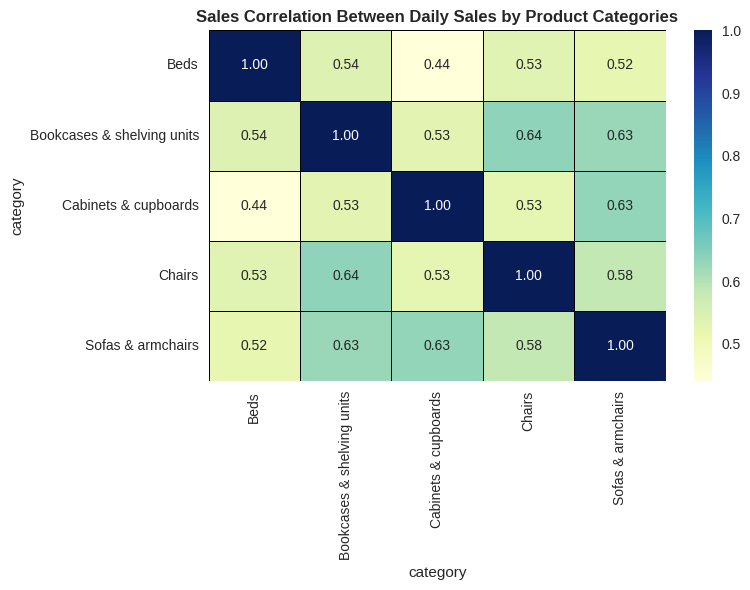

In [79]:
# Visualizing Correlation Matrix
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu", fmt = ".2f", linewidths = 0.5, linecolor = "black")
plt.title("Sales Сorrelation Between Daily Sales by Product Categories", fontweight = "bold")
plt.tight_layout()
plt.show()

In [80]:
# Analyzing the statistical significance of the correlation
# Statistical significance is calculated between data for pairs of categories

category_pairs = list(combinations(top_5_categories, 2))  # dividing categories into pairs
alpha = 0.05  # significance level

for cat1, cat2 in category_pairs:
    sales1 = category_metrics[cat1]
    sales2 = category_metrics[cat2]
    correlation, p_value = spearmanr(sales1, sales2)
    print(f"\nDaily Sales in {cat1} & {cat2}:")
    print(f"  Spearman's Coefficient: {correlation:.3f}")
    print(f"  p-value: {p_value:.3e}")
    if p_value < alpha:
        print(f"  Correlation is statistically significant (p < {alpha:.2f}).")
    else:
        print(f"  Correlation is not statistically significant (p >= {alpha:.2f}).")
    # Determining the strength of a correlation
    if correlation == 0:
      print("  No linear correlation")
    elif abs(correlation) > 0 and  abs(correlation) <= 0.33:
      print("  Weak correlation")
    elif abs(correlation) > 0.33 and  abs(correlation) <= 0.66:
      print("  Medium correlation")
    elif abs(correlation) > 0.66 and  abs(correlation) <= 0.99:
      print("  Strong correlation")
    elif abs(correlation) == 1:
      print("  Perfect correlation")
    else:
      print("  Correlation Coefficient Error")


Daily Sales in Sofas & armchairs & Chairs:
  Spearman's Coefficient: 0.583
  p-value: 2.463e-09
  Correlation is statistically significant (p < 0.05).
  Medium correlation

Daily Sales in Sofas & armchairs & Beds:
  Spearman's Coefficient: 0.522
  p-value: 1.864e-07
  Correlation is statistically significant (p < 0.05).
  Medium correlation

Daily Sales in Sofas & armchairs & Bookcases & shelving units:
  Spearman's Coefficient: 0.626
  p-value: 7.189e-11
  Correlation is statistically significant (p < 0.05).
  Medium correlation

Daily Sales in Sofas & armchairs & Cabinets & cupboards:
  Spearman's Coefficient: 0.631
  p-value: 4.323e-11
  Correlation is statistically significant (p < 0.05).
  Medium correlation

Daily Sales in Chairs & Beds:
  Spearman's Coefficient: 0.535
  p-value: 7.913e-08
  Correlation is statistically significant (p < 0.05).
  Medium correlation

Daily Sales in Chairs & Bookcases & shelving units:
  Spearman's Coefficient: 0.637
  p-value: 2.585e-11
  Correlat

According to the results, correlation of daily sales among top-5 product categories is medium positive and statistically significant.

**General observations:**
- For all pairs of categories considered, there is a statistically significant correlation (p-value < 0.05). This means that there is a non-random relationship between the daily sales of these categories.

- All significant correlations are of medium strength (Spearman's coefficient ranges from about 0.44 to 0.64). This indicates a medium level of consistency in the sales dynamics between these categories.

- **Correlation between categories:** A positive correlation can mean that sales of certain product categories tend to rise or fall together, possibly due to seasonality, general economic conditions, or marketing campaigns that affect multiple categories.

### 3.1.5. Sales Correlation on Browser Language

In [81]:
# Grouping data
# Choosing top-3 browser languages by total sales
top_3_languages = df[~df["language"].isin(["Unknown"])].groupby("language")["price"].sum().nlargest(3).index.tolist()

# Data for top-3 browser languages
df_languages = df[df["language"].isin(top_3_languages)]
language_metrics = df_languages.groupby(["order_date", "language"])["price"].sum().unstack(fill_value = 0) # expanding languages into columns

In [82]:
# Сhecking whether the data for each language is normally distributed
# Normality tests

for language in top_3_languages:
  sales = df_languages[df_languages["language"].isin([language])]["price"]
  stat_normaltest, p_value_normaltest = normaltest(sales)
  stat_shapiro, p_value_shapiro = shapiro(sales)

  if p_value_normaltest > 0.05:
    print(f"{language}:\nNormaltest: Data has normal distribution, p-value: {p_value_normaltest}")
  else:
    print(f"{language}:\nNormaltest: Data doesn't have normal distribution, p-value: {p_value_normaltest}")

  if p_value_shapiro > 0.05:
    print(f"Shapiro-Wilk test: Data has normal distribution, p-value: {p_value_shapiro}\n")
  else:
    print(f"Shapiro-Wilk test: Data doesn't have normal distribution, p-value: {p_value_shapiro}\n")

en-us:
Normaltest: Data doesn't have normal distribution, p-value: 0.0
Shapiro-Wilk test: Data doesn't have normal distribution, p-value: 9.526878472098472e-98

en-gb:
Normaltest: Data doesn't have normal distribution, p-value: 7.69925973367773e-293
Shapiro-Wilk test: Data doesn't have normal distribution, p-value: 1.2331625090415685e-54

zh:
Normaltest: Data doesn't have normal distribution, p-value: 2.6169065716619996e-161
Shapiro-Wilk test: Data doesn't have normal distribution, p-value: 2.930123265353616e-42



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15311.
  res = hypotest_fun_out(*samples, **kwds)


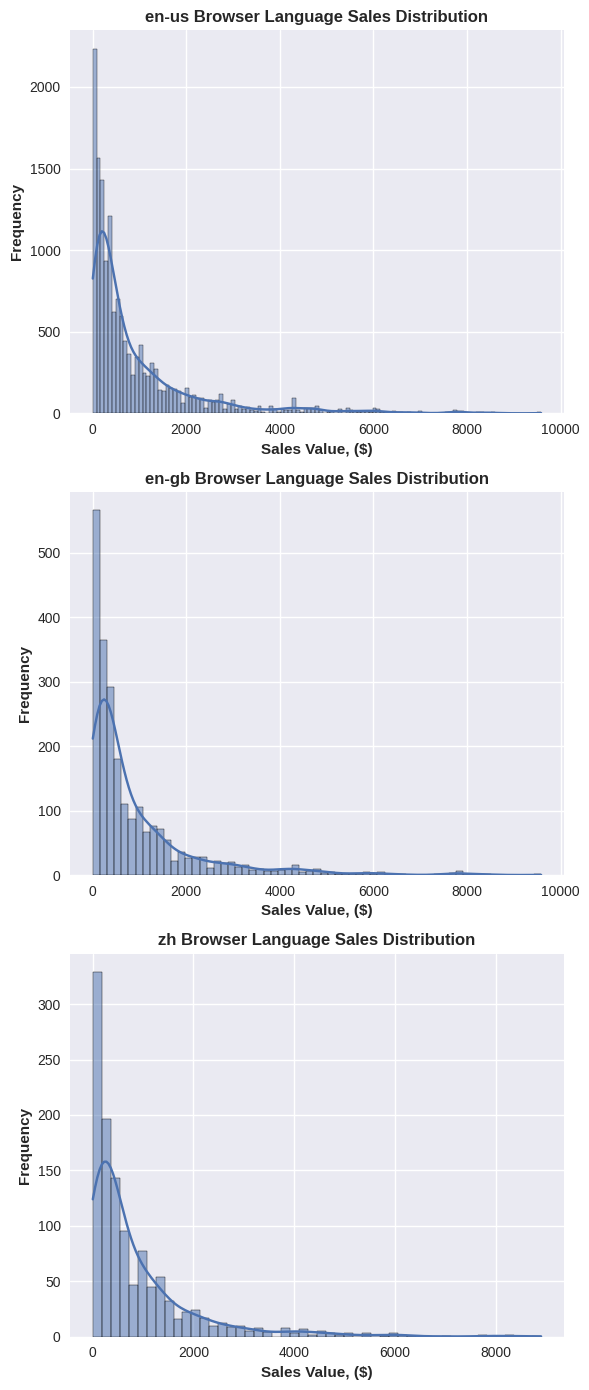

In [83]:
# Distribution Histograms
fig, axes = plt.subplots(nrows = len(top_3_languages), ncols = 1, figsize = (6, 14))

for i, language in enumerate(top_3_languages):
    subset = df_languages[df_languages["language"] == language]
    sns.histplot(subset["price"], kde = True, ax = axes[i])
    axes[i].set_title(f"{language} Browser Language Sales Distribution", fontweight = "bold")
    axes[i].set_xlabel("Sales Value, ($)", fontweight = "bold")
    axes[i].set_ylabel("Frequency", fontweight = "bold")

plt.tight_layout()
plt.show()

Browser Language metrics data ***doesn't have a normal distribution***, so the **Spearman Rank Correlation** will be used to calculate the correlation coefficient.

In [84]:
# Calculating correlation matrix with Spearman Rank Correlation
correlation_matrix = language_metrics.corr(method = "spearman")
print(correlation_matrix)

language     en-gb     en-us        zh
language                              
en-gb     1.000000  0.407717  0.268211
en-us     0.407717  1.000000  0.377146
zh        0.268211  0.377146  1.000000


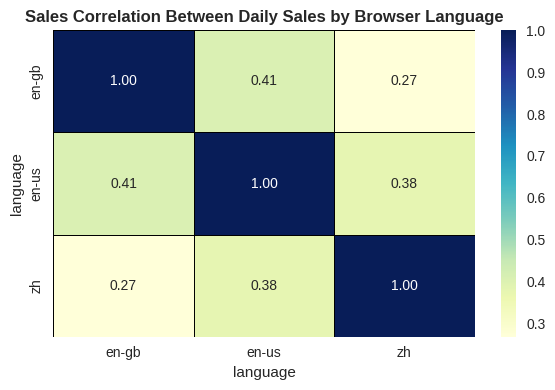

In [85]:
# Visualizing Correlation Matrix
plt.figure(figsize = (6, 4))
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu", fmt = ".2f", linewidths = 0.5, linecolor = "black")
plt.title("Sales Сorrelation Between Daily Sales by Browser Language", fontweight = "bold")
plt.tight_layout()
plt.show()

In [86]:
# Analyzing the statistical significance of the correlation

language_pairs = list(combinations(top_3_languages, 2))
alpha = 0.05  # significance level

for lang1, lang2 in language_pairs:
    sales1 = language_metrics[lang1]
    sales2 = language_metrics[lang2]
    correlation, p_value = spearmanr(sales1, sales2)
    print(f"\nDaily Sales in {lang1} & {lang2}:")
    print(f"  Spearman's Coefficient: {correlation:.3f}")
    print(f"  p-value: {p_value:.3e}")
    if p_value < alpha:
        print(f"  Correlation is statistically significant (p < {alpha:.2f}).")
    else:
        print(f"  Correlation is not statistically significant (p >= {alpha:.2f}).")
    # Determining the strength of a correlation
    if correlation == 0:
      print("  No linear correlation")
    elif abs(correlation) > 0 and  abs(correlation) <= 0.33:
      print("  Weak correlation")
    elif abs(correlation) > 0.33 and  abs(correlation) <= 0.66:
      print("  Medium correlation")
    elif abs(correlation) > 0.66 and  abs(correlation) <= 0.99:
      print("  Strong correlation")
    elif abs(correlation) == 1:
      print("  Perfect correlation")
    else:
      print("  Correlation Coefficient Error")


Daily Sales in en-us & en-gb:
  Spearman's Coefficient: 0.408
  p-value: 8.054e-05
  Correlation is statistically significant (p < 0.05).
  Medium correlation

Daily Sales in en-us & zh:
  Spearman's Coefficient: 0.377
  p-value: 2.922e-04
  Correlation is statistically significant (p < 0.05).
  Medium correlation

Daily Sales in en-gb & zh:
  Spearman's Coefficient: 0.268
  p-value: 1.152e-02
  Correlation is statistically significant (p < 0.05).
  Weak correlation


According to the results, correlation of daily sales among top-3 browser languages is positive and statistically significant:
- Medium:
    - English (US) & English (GB)
    - English(US) & Chinese (zh)
- Weak:
    - English (GB) & Chinese (zh)

Conclusion:
- **The correlation between American and British English:** This may indicate that users who use these two language versions of the browser have similar buying behavior patterns or respond to the same factors. Perhaps they belong to similar demographics or their shopping needs and preferences overlap.

- **Сorrelation between American English and Chinese:** The fact that the correlation is also average may indicate some level of shared influence on the buying behavior of these two groups, but perhaps to a lesser extent than between the two English versions. This may be due to partial audience overlap or the influence of global trends.

- **Weak correlation between British English and Chinese:** This suggests that the purchasing behavior of users who use these two browser languages is not well connected. It is likely that these groups have significantly different needs, preferences, cultural contexts, or are located in different geographical regions, which affects their purchases.

Insights:

- **Similarity of audiences:** The medium correlation between American and British English may indicate that marketing strategies may have some level of commonality for these two groups.

- **Potential for personalization:** The difference in the strength of correlation between different language pairs indicates the potential for a more personalized approach to marketing and content for each language group, especially for Chinese-speaking audiences, who seem to have different patterns from English-speaking users.

- **Localization:** The weak correlation between British English and Chinese highlights the importance of carefully localizing content and offers for Chinese-speaking audiences, as their needs and reactions may differ significantly.

## 3.2. Statistical Analysis of Differences Between Groups

### 3.2.1. Orders of Registered and Unregistered Users

In [87]:
# Dividing data for registered and unregistered users
registered_data = df[df["account_id"].notna()].groupby("order_date")["price"].sum()
unregistered_data = df[df["account_id"].isna()].groupby("order_date")["price"].sum()

In [88]:
# Creating dictionary for better access to users groups data
user_groups_data = {
    "Registered Users": registered_data,
    "Unregistered Users": unregistered_data
}

In [89]:
# Checking the data distribution
alpha = 0.05  # statistical significance

for group, data in user_groups_data.items():
    print(f"{group} group:")

    # Normaltest
    stat_normaltest, p_value_normaltest = normaltest(data.dropna())
    if p_value_normaltest > alpha:
        print(f"  Normaltest:   Normaltest: Data has normal distribution, (p = {p_value_normaltest:.5f})")
    else:
        print(f"  Normaltest:   Normaltest: Data doesn't have normal distribution, (p = {p_value_normaltest:.5f})")

    # Shapiro-Wilk test
    stat_shapiro, p_value_shapiro = shapiro(data.dropna())
    if p_value_shapiro > alpha:
        print(f"  Shapiro-Wilk:   Data has normal distribution, (p = {p_value_shapiro:.5f})\n")
    else:
        print(f"  Shapiro-Wilk:   Data doesn't have normal distribution, (p = {p_value_shapiro:.5f})\n")

Registered Users group:
  Normaltest:   Normaltest: Data doesn't have normal distribution, (p = 0.01093)
  Shapiro-Wilk:   Data doesn't have normal distribution, (p = 0.00730)

Unregistered Users group:
  Normaltest:   Normaltest: Data doesn't have normal distribution, (p = 0.00557)
  Shapiro-Wilk:   Data doesn't have normal distribution, (p = 0.00262)



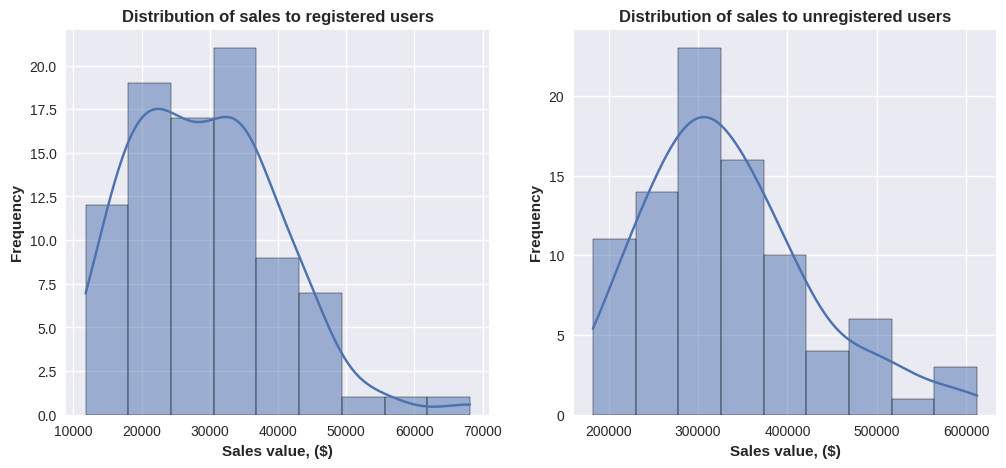

In [90]:
# Plotting data distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(registered_data, kde = True)
plt.title("Distribution of sales to registered users", fontweight = "bold")
plt.xlabel("Sales value, ($)", fontweight = "bold")
plt.ylabel("Frequency", fontweight = "bold")

plt.subplot(1, 2, 2)
sns.histplot(unregistered_data, kde = True)
plt.title("Distribution of sales to unregistered users", fontweight = "bold")
plt.xlabel("Sales value, ($)", fontweight = "bold")
plt.ylabel("Frequency", fontweight = "bold")

plt.show()

Since the data from the two samples are ***not normally*** distributed, the t-test cannot be used to compare the average values and determine the statistical significance of the samples. For the available data, a **Mann-Whitney test (U-test)** can be used.

In [120]:
from scipy.stats import mannwhitneyu

# Mann-Whitney test (U-test)
u_statistic, p_value = mannwhitneyu(registered_data.dropna(), unregistered_data.dropna())

print(f"Mann-Whitney test (U-test) results:")
print(f"    U-statistics: {u_statistic:.3f}")
print(f"    p-value: {p_value:.3e}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"p-value ({p_value:.3e}) < {alpha}; statistically significant difference.")
else:
    print(f"p-value ({p_value:.3e}) >= {alpha}; no statistically significant difference at the {alpha} significance level.")

Mann-Whitney test (U-test) results:
    U-statistics: 0.000
    p-value: 2.216e-30
p-value (2.216e-30) < 0.05; statistically significant difference.


The p-value is small, which means that there is a statistically significant difference between the distributions of daily sales to registered and unregistered users.  
The null hypothesis that there is no difference between the two groups can be rejected.

**Insights:**
- Registered users generate significantly higher sales, so it makes sense to consider methods of additional motivation for new registrations and conduct A/B tests to determine the effectiveness of innovations and whether there is an increase in the number of registrations.
- Focus on retention and engagement: Special attention should be paid to retaining registered users. The benefits of registration (e.g., personalized offers, ease of repeat purchases, loyalty programs) can help increase sales from this group.

### 3.2.2. Number of Sessions by Traffic Channels


In [92]:
# Traffic Chammels
df["channel"].unique()

array(['Undefined', 'Paid Search', 'Direct', 'Organic Search',
       'Social Search'], dtype=object)

In [93]:
# Dividing data due to sales channel
paid_search_channel = df[df["channel"].isin(["Paid Search"])].groupby("order_date")["ga_session_id"].count()
direct_channel = df[df["channel"].isin(["Direct"])].groupby("order_date")["ga_session_id"].count()
organic_search_channel = df[df["channel"].isin(["Organic Search"])].groupby("order_date")["ga_session_id"].count()
social_search_channel = df[df["channel"].isin(["Social Search"])].groupby("order_date")["ga_session_id"].count()
undefined_channel = df[df["channel"].isin(["Undefined"])].groupby("order_date")["ga_session_id"].count()

In [94]:
# Creating dictionary for better access to channels data
channels_sessions = {
    "Paid Search": paid_search_channel,
    "Direct": direct_channel,
    "Organic Search": organic_search_channel,
    "Social Search": social_search_channel,
    "Undefined": undefined_channel
}

In [95]:
# Checking the data distribution
alpha = 0.05    # statistical significance

for channel, sessions in channels_sessions.items():
    print(f"{channel} channel:")

    # Normaltest
    stat_normaltest, p_value_normaltest = normaltest(sessions.dropna())
    if p_value_normaltest > alpha:
        print(f"  Normaltest: Data has normal distribution, (p = {p_value_normaltest:.5f})")
    else:
        print(f"  Normaltest: Data doesn't have normal distribution, (p = {p_value_normaltest:.5f})")

    # Shapiro-Wilk test
    stat_shapiro, p_value_shapiro = shapiro(sessions.dropna())
    if p_value_shapiro > alpha:
        print(f"  Shapiro-Wilk: Data has normal distribution, (p = {p_value_shapiro:.5f})\n")
    else:
        print(f"  Shapiro-Wilk: Data doesn't have normal distribution, (p={p_value_shapiro:.5f})\n")

Paid Search channel:
  Normaltest: Data doesn't have normal distribution, (p = 0.00047)
  Shapiro-Wilk: Data doesn't have normal distribution, (p=0.00340)

Direct channel:
  Normaltest: Data has normal distribution, (p = 0.18367)
  Shapiro-Wilk: Data has normal distribution, (p = 0.09281)

Organic Search channel:
  Normaltest: Data doesn't have normal distribution, (p = 0.00014)
  Shapiro-Wilk: Data doesn't have normal distribution, (p=0.00189)

Social Search channel:
  Normaltest: Data has normal distribution, (p = 0.06088)
  Shapiro-Wilk: Data doesn't have normal distribution, (p=0.03876)

Undefined channel:
  Normaltest: Data has normal distribution, (p = 0.12768)
  Shapiro-Wilk: Data has normal distribution, (p = 0.05956)



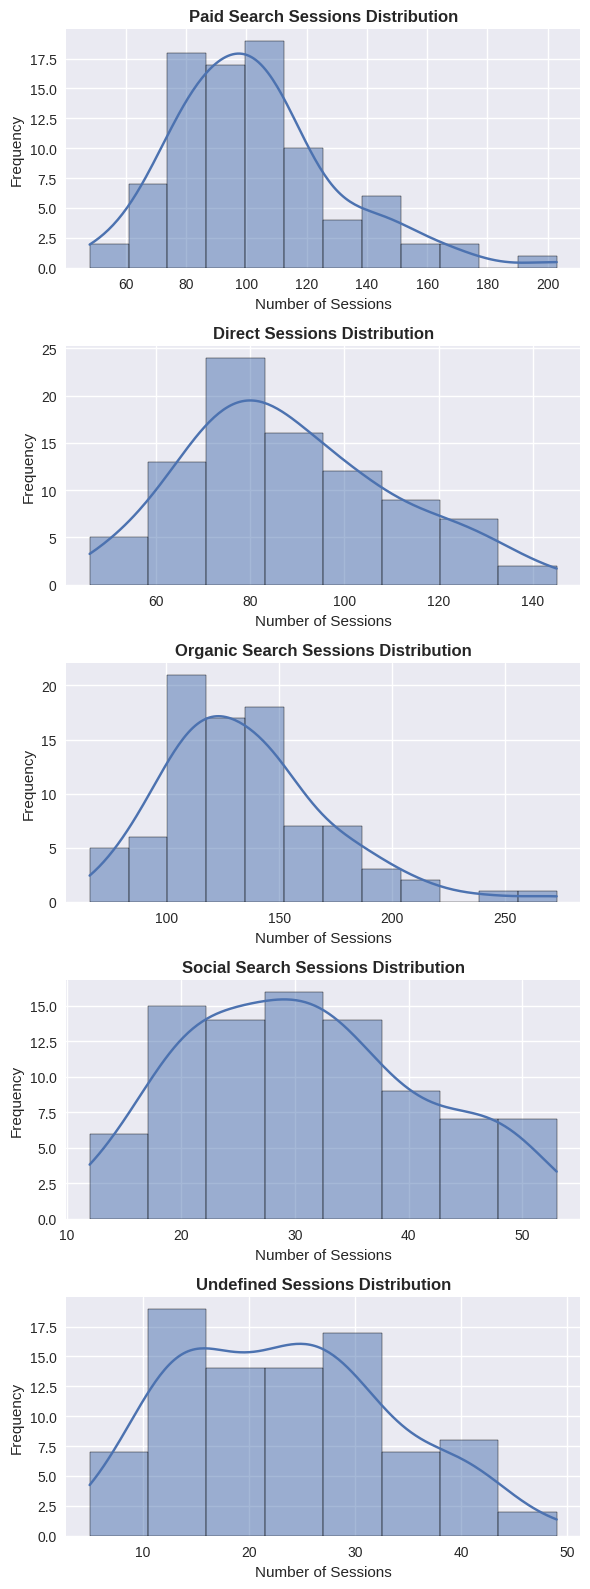

In [96]:
# Distribution Histograms

fig, axes = plt.subplots(nrows = len(channels_sessions), ncols = 1, figsize = (6, 16))

for i, (channel, sessions) in enumerate(channels_sessions.items()):
  sns.histplot(sessions.dropna(), kde = True, ax = axes[i])
  axes[i].set_title(f"{channel} Sessions Distribution", fontweight = "bold")
  axes[i].set_xlabel("Number of Sessions")
  axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Since not all traffic channel data is normally distributed, ANOVA (z-test) cannot be used to determine statistical significance between samples. For 5 samples, a nonparametric test is required - the **Kruskall-Wallis test**.

In [97]:
from scipy.stats import kruskal

# Data from Dict
sessions_paid = channels_sessions["Paid Search"].dropna()
sessions_direct = channels_sessions["Direct"].dropna()
sessions_organic = channels_sessions["Organic Search"].dropna()
sessions_social = channels_sessions["Social Search"].dropna()
sessions_undefined = channels_sessions["Undefined"].dropna()

# the Kruskall-Wallis test
h_statistic, p_value = kruskal(sessions_paid, sessions_direct, sessions_organic, sessions_social, sessions_undefined)

print("Kruskall-Wallis test results:")
print(f"H-statistics: {h_statistic:.3f}")
print(f"p-value: {p_value:.3e}")

alpha = 0.05
if p_value < alpha:
    print(f"\np-value ({p_value:.3e}) < {alpha}, therefore, there are statistically significant differences between the number of sessions in at least one pair of channels.")
else:
    print(f"\np-value ({p_value:.3e}) >= {alpha}, therefore, there are no statistically significant differences between the number of sessions on different channels at the significance level {alpha}.")

Kruskall-Wallis test results:
H-statistics: 349.425
p-value: 2.334e-74

p-value (2.334e-74) < 0.05, therefore, there are statistically significant differences between the number of sessions in at least one pair of channels.


- The extremely small p-value obtained from the Kruskal-Wallis test indicates that there are statistically significant differences between the number of sessions in at least one pair of traffic channels.
- At least one channel has a statistically different distribution of session counts compared to one or more of the other channels.
- The need for further analysis: To determine which channels are statistically different from each other, comparisons between pairs of channels are needed. The Kruskal-Wallis test only indicates the presence of differences, but does not indicate between which groups. Therefore, additional research can be conducted if necessary.

### 3.2.3. The Share of Sessions With Organic Traffic in Europe and Americas

In [103]:
# Preparind Data Series
americas_total = df[df["continent"].isin(["Americas"])].groupby("order_date")["ga_session_id"].count()
europe_total = df[df["continent"].isin(["Europe"])].groupby("order_date")["ga_session_id"].count()

americas_organic = df[df["continent"].isin(["Americas"]) & df["channel"].isin(["Organic Search"])].groupby("order_date")["ga_session_id"].count()
europe_organic = df[df["continent"].isin(["Europe"]) & df["channel"].isin(["Organic Search"])].groupby("order_date")["ga_session_id"].count()

# The Share of Organic Traffic
americas_share = (americas_organic / americas_total).fillna(0)
europe_share = (europe_organic / europe_total).fillna(0)

In [106]:
# Creating dictionary for better access to data
continent_share = {
    "Americas": americas_share,
    "Europe": europe_share,
}

In [107]:
# Checking the data distribution
alpha = 0.05    # statistical significance

for continent, share in continent_share.items():
    print(f"{continent} continent:")

    # Normaltest
    stat_normaltest, p_value_normaltest = normaltest(share.dropna())
    if p_value_normaltest > alpha:
        print(f"  Normaltest: Data has normal distribution, (p = {p_value_normaltest:.5f})")
    else:
        print(f"  Normaltest: Data doesn't have normal distribution, (p = {p_value_normaltest:.5f})")

    # Shapiro-Wilk test
    stat_shapiro, p_value_shapiro = shapiro(share.dropna())
    if p_value_shapiro > alpha:
        print(f"  Shapiro-Wilk: Data has normal distribution, (p = {p_value_shapiro:.5f})\n")
    else:
        print(f"  Shapiro-Wilk: Data doesn't have normal distribution, (p={p_value_shapiro:.5f})\n")

Americas continent:
  Normaltest: Data has normal distribution, (p = 0.07307)
  Shapiro-Wilk: Data doesn't have normal distribution, (p=0.03788)

Europe continent:
  Normaltest: Data has normal distribution, (p = 0.51073)
  Shapiro-Wilk: Data has normal distribution, (p = 0.95197)



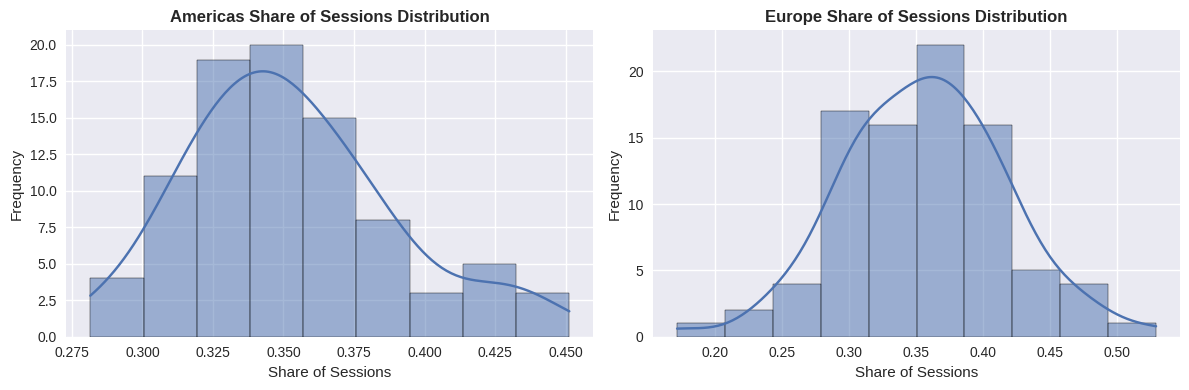

In [116]:
# Distribution Histograms

fig, axes = plt.subplots(nrows = 1, ncols = len(continent_share), figsize = (12, 4))

for i, (continent, share) in enumerate(continent_share.items()):
  sns.histplot(share.dropna(), kde = True, ax = axes[i])
  axes[i].set_title(f"{continent} Share of Sessions Distribution", fontweight = "bold")
  axes[i].set_xlabel("Share of Sessions")
  axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Since Europe's data distribution is determined to be normal, but there are doubts for America (one test shows normality, the other does not), the use of a standard independent t-test may not be entirely correct due to the potential violation of the normality assumption for the American sample.  
For this reason, the nonparametric **Mann-Whitney test (U-test)** will be used for further comparison of the samples.

In [118]:
# Mann-Whitney test (U-test)
u_statistic, p_value = mannwhitneyu(americas_share.dropna(), europe_share.dropna())

print(f"Mann-Whitney test (U-test) results:")
print(f"    U-statistics: {u_statistic:.3f}")
print(f"    p-value: {p_value:.3f}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"p-value ({p_value:.3f}) < {alpha}; statistically significant difference.")
else:
    print(f"p-value ({p_value:.3f}) >= {alpha}; no statistically significant difference at the {alpha} significance level.")

Mann-Whitney test (U-test) results:
    U-statistics: 3677.000
    p-value: 0.565
p-value (0.565) >= 0.05; no statistically significant difference at the 0.05 significance level.


- Based on the Mann-Whitney U-test, the null hypothesis that there is no statistically significant difference between the distributions of the shares of sessions with organic traffic in Europe and the United States cannot be rejected.
- **Similar importance of organic traffic:** Organic traffic seems to play a relatively equal role in user acquisition in Europe and the Americas, at least as measured by its share of total sessions by day.

### 3.2.4. Differences in the Average Purchase Price Between Different Browsers

In [122]:
# All browsers
df["browser"].unique()

array(['Safari', 'Chrome', 'Firefox', 'Edge', 'Android Webview',
       '<Other>'], dtype=object)

In [138]:
# Data Series for analysis of three browsers (Chrome, Safari, Firefox)
chrome_data = df[df["browser"].isin(["Chrome"])].groupby("order_date")["price"].mean()
safari_data = df[df["browser"].isin(["Safari"])].groupby("order_date")["price"].mean()
firefox_data = df[df["browser"].isin(["Firefox"])].groupby("order_date")["price"].mean()

In [130]:
# Creating dictionary for better access to data
browsers_data = {
    "Chrome": chrome_data,
    "Safari": safari_data,
    "Firefox": firefox_data,
}

In [131]:
# Checking the data distribution
alpha = 0.05    # statistical significance

for browser, price in browsers_data.items():
    print(f"{browser}:")

    # Normaltest
    stat_normaltest, p_value_normaltest = normaltest(price.dropna())
    if p_value_normaltest > alpha:
        print(f"  Normaltest: Data has normal distribution, (p = {p_value_normaltest:.5f})")
    else:
        print(f"  Normaltest: Data doesn't have normal distribution, (p = {p_value_normaltest:.5f})")

    # Shapiro-Wilk test
    stat_shapiro, p_value_shapiro = shapiro(price.dropna())
    if p_value_shapiro > alpha:
        print(f"  Shapiro-Wilk: Data has normal distribution, (p = {p_value_shapiro:.5f})\n")
    else:
        print(f"  Shapiro-Wilk: Data doesn't have normal distribution, (p = {p_value_shapiro:.5f})\n")

Chrome:
  Normaltest: Data has normal distribution, (p = 0.42710)
  Shapiro-Wilk: Data has normal distribution, (p = 0.09282)

Safari:
  Normaltest: Data has normal distribution, (p = 0.92826)
  Shapiro-Wilk: Data has normal distribution, (p = 0.96945)

Firefox:
  Normaltest: Data doesn't have normal distribution, (p = 0.00000)
  Shapiro-Wilk: Data doesn't have normal distribution, (p = 0.00000)



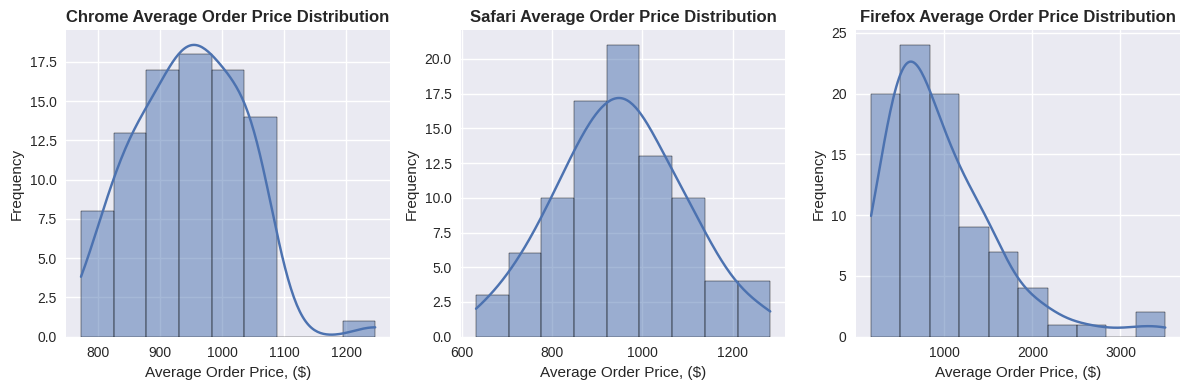

In [134]:
# Distribution Histograms

fig, axes = plt.subplots(nrows = 1, ncols = len(browsers_data), figsize = (12, 4))

for i, (browser, price) in enumerate(browsers_data.items()):
  sns.histplot(price.dropna(), kde = True, ax = axes[i])
  axes[i].set_title(f"{browser} Average Order Price Distribution", fontweight = "bold")
  axes[i].set_xlabel("Average Order Price, ($)")
  axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Since the data for Chrome and Safari have distributions close to normal, a **t-test** can be performed separately for them after the **Kruskall-Wallis testtest for the three browsers** is performed simultaneously, since Firefox does not have a normal distribution.

In [135]:
# Data from Dict
chrome = browsers_data["Chrome"].dropna()
safari = browsers_data["Safari"].dropna()
firefox = browsers_data["Firefox"].dropna()

# the Kruskall-Wallis test
h_statistic, p_value = kruskal(chrome, safari, firefox)

print("Kruskall-Wallis test results:")
print(f"H-statistics: {h_statistic:.3f}")
print(f"p-value: {p_value:.3e}")

alpha = 0.05
if p_value < alpha:
    print(f"\np-value ({p_value:.3e}) < {alpha}, therefore, there are statistically significant differences between the number of sessions in at least one pair of channels.")
else:
    print(f"\np-value ({p_value:.3e}) >= {alpha}, therefore, there are no statistically significant differences between the number of sessions on different channels at the significance level {alpha}.")

Kruskall-Wallis test results:
H-statistics: 5.193
p-value: 7.452e-02

p-value (7.452e-02) >= 0.05, therefore, there are no statistically significant differences between the number of sessions on different channels at the significance level 0.05.


In [137]:
from scipy import stats

# t-test for Chrome and Safari data
t_statistic, p_value = stats.ttest_ind(chrome, safari, equal_var = False) # equal_var = False in case of different dispersions

print("t-test results:")
print(f"T-statistics: {t_statistic:.3f}")
print(f"p-value: {p_value:.3e}")

alpha = 0.05
if p_value < alpha:
    print(f"\np-value ({p_value:.3e}) < {alpha}, therefore, there are statistically significant differences between the number of sessions in at least one pair of channels.")
else:
    print(f"\np-value ({p_value:.3e}) >= {alpha}, therefore, there are no statistically significant differences between the number of sessions on different channels at the significance level {alpha}.")

t-test results:
T-statistics: -0.166
p-value: 8.684e-01

p-value (8.684e-01) >= 0.05, therefore, there are no statistically significant differences between the number of sessions on different channels at the significance level 0.05.


- Taking into account the results of all the tests, there is **no statistically significant difference** between the average values of the samples of the average daily value of purchases from Chrome, Safari and Firefox browsers.
- Products and pricing are likely to be attractive to users regardless of their browser. There is no need for special browser-specific strategies (at least based on the average value of purchases per day).

# 4. Tableau Dashboard

[Link to the Dashboard](https://public.tableau.com/views/OnlineStoreSalesAnalytics_17488619575410/OnlineStoreSalesAnalytics?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

# 5. Reporting

## 5.1. Project Summary

**Objective**:
  - Extracting data from a e-commerce  database using SQL;
  - Data description;
  - Exploratory and statistical analysis in Python;
  - Creating Tableau dashboard;
  - Finding valuable insights into the company's operations.

**Goal**:
- Online store sales analytics;
- Identifying business insights.

**Data Source**: BiqQuery

**Tools Used**:
- SQL;
- Python (pandas, numpy, seaborn, matplotlib, scipy, pivot, datetime, itertools.combinations, google.colab);
- Python scipy.stats: normaltest, shapiro, ttest_ind, spearmanr, mannwhitneyu, kruskal;
- Tableau
- Markdown.

## 5.2. Data Overwiev

**Date Range**: from 2020-11-01 to 2021-01-27.

**DataFrame Structure:** 33538 records (unique sessions with orders) in 20 columns

**Key Fields**:
- Session parameters: *order_date*, *ga_session_id*, *continent*, *country*, *device*, *browser*, *mobile_model_name*, *language*, *channel*;
- Account parameters: *account_id*, *is_verified*, *is_unsubscribed*;
- Product parameters: *category*, *price*.

## 5.3. Key Findings

### Key Metrics

In [139]:
display(metrics_df)

,Metric,Value
0,Total Number of Sessions with Orders,33538
1,Number of Continents Covered,6
2,Number of Countries Covered,108
3,Number of Devices,3
4,Number of Operating Systems,6
5,Number of Languages,9
6,Number of Products,550
7,Number of Product Categories,14
8,Number of Registered Accounts,2781


### Sales Trends

**Top-3 Continents** by Sales and Number of Orders:  
1. Americas  
2. Asia  
3. Europe

**Top-5 Countries** by Sales and Number of Orders:  
1. United States   
2. India   
3. Canada   
4. United Kingdom  
5. France

**_The largest number of orders:_**
- by continent: 18,553 orders (Americas)
- by country:  14,673 orders (United States)



**Top-10 Product Categories by Total Sales:**  
1. Sofas & Armchairs  
2. Chairs  
3. Beds  
4. Bookcases & Shelving Units  
5. Cabinets & Cupboards  
6. Outdoor Furniture  
7. Tables & Desks  
8. Chests of Drawers & Drawer Units   
9. Bar Furniture  
10. Children's Furniture

**Device Models and Browser by Sales (% of total):**  
1. Chrome (27.84%)  
2. Safari (20.30%)  
3. iPhone (20.08%)  
4. ChromeBook (5.73%)  
5. Edge (2.18%)  
6. IPad (1.40%)  
7. Firefox (1.32%)  
8. Pixel 4 XL (0.36%)  
9. Pixel 3 (0.34%)  
10. Other (20.44%)  

**Subscription Sales Dependance:**
- Subscribed users group has bigger total sales value;
- Unsubscribed users group has higher average order price.

**Top-5 countries by Registering Accounts:**
1. United Satates (43.4%)
2. India (8.8%)
3. Canada (7.4%)
4. United Kingdom (3.2%)
5. France and Germany (2%)

### Results of Dynamics Analysis

- **General Sales and order dynamics:**   
  Quite stable. There are peaks in the beginning of December 2020.
- **Sales Seasonality:**   
Tuesday, Wednesday, and Thursday are the days of the week with the statistically highest number of orders. The lowest number of orders is on Sunday and Saturday.
- **Sales Dynamics by Continents:**   
Sales dynamics for Americas, Asia, and Europe has almost the same behaviour taking into account the scale difference.  Americas has the highest sales dynamics, Europe and Asia are nearly equal.
- **Sales Dynamics by Traffic Channels:**
    - For Direct, Paid Search, and Organic Search, sales data has nearly the same high dynamics.  
    - For Social Search and Undefined channels, the dynamics is times lower.
    
    - Descending list of sales dynamics for Channels:
      1. Organic Search
      2. Paid Search
      3. Direct
      4. Social Search

- **Sales Dynamics by Device Type:**
    - The highest dynamics is for desktop devices;
    - The lowest dynamics is for tablets;
    - Dynamics for desktop and mobile have similar trends.

### Categorical Data Analysis

**Sessions by Traffic Channels and Device Types (Top Combinations by Number of Orders):**
- desktop + Organic Search
- desktop + Paid Search
- desktop + Direct and mobile + Organic Search
- mobile + Paid Search
- mobile + Direct
- desktop + Social Search
- mobile + Social Search
- tablet + Organic Search
- tablet + Paid Search
- tablet + Direct
- tablet + Social Search

**Top Traffic Channels have the same order for all devices:**
1. Organic Search
2. Paid Search
3. Direct
4. Social Search

**Country & Product Categiry with the largest number of orders**  
1. United States, category: Bookcases & Shelving Units  
2. United States, category: Chairs  
3. United States, category: Sofas & Armchairs

**Top Category in Top-5 Countries by Sales**  
1. United States, category: Bookcases & Shelving Units  
2. India, category: Bookcases & Shelving Units  
3. Canada, category: Bookcases & Shelving Units   
4. United Kingdom, category: Bookcases & Shelving Units   
5. France, category: Bookcases & Shelving Units

**Average Order Price by Category and Device Type**
- The average price by category and device is almost similarly distributed, so users do not tend to buy more expensive products in certain categories depending on the type of device.   
- The exception is the "Café furniture" category, where the average purchase price is twice as high as on other devices. But it also possible that there is lack of data because "Café furniture" category is not in top-10 categories by total sales. There is lack of data for making any conclusion.

### Statistical Correlation Analysis

**Total Sales & Number of Sessions Correlation:**
- Data *doesn't have a normal distribution*
- Calculating the correlation coefficient with the ***Spearman Rank Correlation***.  

The correlation between Total Sales and Session Count has a strong positive statistically significant value. That means that as the Number of Sessions per day increases, Total Sales also increases, which is logically true.

**Continent & Daily Sales Correlation:**  
- Continent metrics data *doesn't have a normal distribution*
- Calculating the correlation coefficient with the ***Spearman Rank Correlation***.

Correlation among daily sales on the top-3 continents is positive and statistically significant, medium for Americas-Europe and Asia-Europe pairs, strong for Americas-Asia pair.

**Traffic Channel & Daily Sales Correlation:**   
- Traffic Channel metrics data *doesn't have a normal distribution*
- Calculating the correlation coefficient with the ***Spearman Rank Correlation***.

Correlation among sales channels is positive and statistically significant, which indicates that there is a non-random relationship between the dynamics of sales through these channels:
  - Medium correlation:
    - Undefined and all other sales channels (Paid Search, Direct, Organic Search, and Social Search)
    - Social Search and all other channels (Paid Search, Undefined, Direct, and Organic Search)
  - Strong correlation:
    - Paid Search and Direct
    - Paid Search and Organic Search
    - Direct and Organic Search

**Product Category & Daily Sales Correlation:**  

- Product Categories metrics data *doesn't have a normal distribution*
- Calculating the correlation coefficient with the ***Spearman Rank Correlation***.

Correlation of daily sales among top-5 product categories is medium positive and statistically significant.  

For all pairs of categories considered, there is a statistically significant correlation (p-value < 0.05). This means that there is a non-random relationship between the daily sales of these categories.

All significant correlations are of medium strength (Spearman's coefficient ranges from about 0.44 to 0.64). This indicates a medium level of consistency in the sales dynamics between these categories.

**Browser Language & Daily Sales Correlation:**

- Browser Language metrics data *doesn't have a normal distribution*
- Calculating the correlation coefficient with ***Spearman Rank Correlation***.

Correlation of daily sales among top-3 browser languages is positive and statistically significant:
  - Medium:
    - English (US) & English (GB)
    - English(US) & Chinese (zh)
  - Weak:
    - English (GB) & Chinese (zh)




### Statistical Analysis of Differences Between Groups

**Orders of Registered and Unregistered Users:**
- Data is *not normally* distributed, the t-test cannot be used to compare the average values and determine the statistical significance of the samples.
- The ***Mann-Whitney test (U-test)*** was used.

The p-value is small, which means that there is a statistically significant difference between the distributions of daily sales to registered and unregistered users.  
The null hypothesis that there is no difference between the two groups can be rejected.


**Number of Sessions by Traffic Channels:**
- Not all traffic channel data is normally distributed, ANOVA (z-test) cannot be used to determine statistical significance between samples.
- For 5 samples, a nonparametric test is required - the ***Kruskall-Wallis test***.

The extremely small p-value obtained from the Kruskal-Wallis test indicates that there are statistically significant differences between the number of sessions in at least one pair of traffic channels.

At least one channel has a statistically different distribution of session counts compared to one or more of the other channels.

*The need for further analysis:* To determine which channels are statistically different from each other, comparisons between pairs of channels are needed. The Kruskal-Wallis test only indicates the presence of differences, but does not indicate between which groups. Therefore, additional research can be conducted if necessary.

**The Share of Sessions With Organic Traffic in Europe and Americas:**
- Europe's data distribution is determined to be normal
- As for America, one test shows normality, the other does not
- The use of a standard independent t-test may not be entirely correct due to the potential violation of the normality assumption for the American sample.  
- The nonparametric ***Mann-Whitney test (U-test)*** will be used for further comparison of the samples.

There is no statistically significant difference between the distributions of the shares of sessions with organic traffic in Europe and the United States.


**Differences in the Average Purchase Price Between Different Browsers:**
- The data for Chrome and Safari have distributions close to normal
- Firefox does not have a normal distribution
- ***t-test*** can be performed separately for Chrome and Safari
- ***Kruskall-Wallis testtest for the three browsers*** is performed simultaneously for three browsers.

There is no statistically significant difference between the average values of the samples of the average daily value of purchases from Chrome, Safari and Firefox browsers.

## 5.4. Business Insights

**Device Type, Browser, and Device Model**
- The most popular device type is a desktop
- Top browsers and mobile models: Chrome, Safari, IPhone
- Develop marketing strategy for attracting new Android users (for example, special Android features or design, entry discount)
- Products and pricing are likely to be attractive to users regardless of their browser. There is no need for special browser-specific strategies (at least based on the average value of purchases per day).

**Account Creation and Subscription Promotion**  

As sales data shows that registered and subscribed users generate significantly higher total sales, but the average order price is higher for unsubscribed ones, marketing strategy should focus on finding the way to promote creating accounts and subscribtions and conduct A/B tests to determine the effectiveness of innovations and whether there is an increase in the number of registrations.

Examples of creating account promotion:
- Discount after creating a new account
- Developing loyalty program for regular customers
- Designing a referral program, where customers can invite other potential customers and gain special options (promotions, gift sertificates, discount)

Focus on retention and engagement:   
- Special attention should be paid to retaining registered users.


**Seasonality**

Based on available data, Tuesday, Wednesday, and Thursday are the days of the week with the statistically highest number of orders.  
- Marketing startegy can be developed due to this seasonality by focusing on increasing sales during these days. For example, by announcing new products, promoting top products categories.

**Continent and Country Localization**

- United States have 43.4% of registered accounts, India has 8.8%, Canada - 7.4%, United Kingdom - 3.2%.   
If there is the goal to increase number of customers from these countries, additional research of possible localization options should be conducted. After that, A/B tests should be done in order to evaluate changes.

- Dependence between Americas and Asia markets:   
Finding a statistically significant positive correlation between sales on two continents may indicate that these markets are affected by similar global factors (e.g., seasonality, economic trends, multi-region marketing campaigns).

**Languges:**
- ***The correlation between American and British English:*** Positive correlation may indicate that users who use these two language versions of the browser have similar buying behavior patterns or respond to the same factors. Perhaps they belong to similar demographics or their shopping needs and preferences overlap.

- ***Сorrelation between American English and Chinese:*** The fact that the correlation is medium may indicate some level of shared influence on the buying behavior of these two groups, but perhaps to a lesser extent than between the two English versions. This may be due to partial audience overlap or the influence of global trends.

- ***Weak correlation between British English and Chinese:*** This suggests that the purchasing behavior of users who use these two browser languages is not well connected. It is likely that these groups have significantly different needs, preferences, cultural contexts, or are located in different geographical regions, which affects their purchases.

- ***Similarity of audiences:*** The medium correlation between American and British English may indicate that marketing strategies may have some level of commonality for these two groups.

- ***Potential for personalization:*** The difference in the strength of correlation between different language pairs indicates the potential for a more personalized approach to marketing and content for each language group, especially for Chinese-speaking audiences, who seem to have different patterns from English-speaking users.

- ***Localization:*** The weak correlation between British English and Chinese highlights the importance of carefully localizing content and offers for Chinese-speaking audiences, as their needs and reactions may differ significantly.


**Traffic Channels**

A positive correlation may indicate that certain traffic channels respond to the same external factors or have synergies. For example, a successful advertising campaign can increase sales both through direct traffic and paid advertising.

- The strong positive correlation between Paid Search, Direct, and Organic Search suggests that these three channels have similar sales dynamics.   
When sales grow through one of these channels, they tend to grow through the others as well. This can be due to general market trends, seasonality, or the effectiveness of marketing campaigns that reinforce each other. Strong search advertising can increase brand awareness, leading to an increase in both organic traffic and direct engagements.

**Product Categories**

- Top product category in top-5 countries by sales is "Bookcases & Shelving Units". For increasing sales new item can be added to this category.